In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')

In [2]:
nithya = pd.read_csv('data/nithyas_tweets.csv')

In [17]:
nithya.head()

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets
0,Nithya Raman,@nithyavraman,2020-11-04 01:22:32,This campaign was never about any one person. ...,,57.0,261,2000
1,Nithya Raman,@nithyavraman,2020-11-17 22:32:56,Very excited to be joining \n@PplsAction\n and...,,3.0,26,190
2,Nithya Raman,@nithyavraman,2020-11-07 01:58:36,"To the residents of CD4, our brilliant, kind, ...",,184.0,1500,13000
3,Nithya Raman,@nithyavraman,2020-11-07 02:01:25,Replying to \n@nithyavramanTo the people of Co...,,5.0,15,779
4,Nithya Raman,@nithyavraman,2020-11-07 02:02:06,I have countless people to thank individually....,,25.0,25,961


In [4]:
nithya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserName   543 non-null    object 
 1   Handle     543 non-null    object 
 2   Timestamp  543 non-null    object 
 3   Text       543 non-null    object 
 4   Emojis     20 non-null     object 
 5   Comments   498 non-null    float64
 6   Likes      540 non-null    object 
 7   Retweets   543 non-null    object 
dtypes: float64(1), object(7)
memory usage: 34.1+ KB


In [5]:
nithya.loc[nithya.Likes.isin(['1.5K', '1.3K', '1.1K', '1K', '2.2K', '1.6K', '5.7K', '1.2K', '3K']) , ['Retweets']] = [13000, 5700, 4100, 3700, 5000, 3700, 2700, 10000, 10900, 22100, 3900]

nithya.loc[nithya.Likes.isin(['1.5K', '1.3K', '1.1K', '1K', '2.2K', '1.6K', '5.7K', '1.2K', '3K']) , ['Likes']] = [1500, 1300, 1100, 1000, 2200, 1600, 1500, 5700, 1200, 3000, 1300]


In [6]:
nithya.loc[nithya.Retweets.isin(['1K']) , ['Retweets']] = [1000, 1000, 1000, 1000, 1000, 1000]

In [7]:
nithya.loc[nithya.Retweets.isin(['1K', '2K', '1.1K', '1.2K', '3.4K', '2.9K', '2.5K',
                                 '6.2K', '1.8K', '1.9K', '1.4K', '1.3K', '2.4K', '3.1K', 
                                 '1.6K', '1.5K', '3.5K', '3.8K', '2.3K', '3.3K']) , ['Retweets']] = [2000, 1100, 1200, 3400, 2900, 2500, 6200, 1200, 1800, 1900, 1400, 1300, 
                                                                                                    2400, 3100, 1300, 2500, 1200, 1800, 1600, 1100, 1300, 
                                                                                                      1500, 3500, 1200, 3800, 1200, 2400, 2300, 3300]

In [10]:
nithya = nithya[nithya.Handle=='@nithyavraman'] 

In [11]:
nithya.Emojis.fillna('', inplace=True)

In [12]:
nithya['Comments'].fillna(0, inplace=True)
nithya['Likes'].fillna(0, inplace=True)

In [13]:
nithya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 542
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserName   535 non-null    object 
 1   Handle     535 non-null    object 
 2   Timestamp  535 non-null    object 
 3   Text       535 non-null    object 
 4   Emojis     535 non-null    object 
 5   Comments   535 non-null    float64
 6   Likes      535 non-null    object 
 7   Retweets   535 non-null    object 
dtypes: float64(1), object(7)
memory usage: 37.6+ KB


In [14]:
nithya = nithya.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32'})

In [16]:
nithya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 542
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   535 non-null    object        
 1   Handle     535 non-null    object        
 2   Timestamp  535 non-null    datetime64[ns]
 3   Text       535 non-null    object        
 4   Emojis     535 non-null    object        
 5   Comments   535 non-null    float64       
 6   Likes      535 non-null    int32         
 7   Retweets   535 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 33.4+ KB


In [30]:
david = pd.read_csv('data/davids_tweets.csv')

In [31]:
david.Comments.loc[david.Comments.isin(['28K' , '70.7K','12.6K', '2.2K', '6.2K','43.6K','3.9K','1.6K'])] = [2800, 70700, 12600, 2200, 6200, 43600, 3900, 1600]

In [32]:
david.Likes.loc[david.Likes.isin(['29.5K', '7.7K', '1.3K', '2.4K', '128.5K','24.2K',
       '46.3K', '22.2K', '44.4K', '47.2K', '3.3K', '2K','16.6K'])] = [29500, 7700, 1300, 2400, 128500, 24200, 46300, 22200, 44400, 47200, 3300, 2000, 16600]

In [33]:
david.Retweets.loc[david.Retweets.isin(['52.6K','5.2K','1.2K', '6K', '17.9K', '656.2K','113.4K', '217.3K',
       '150.4K', '3K', '2.2K', '219K', '12.4K',
       '1.3K','6.3K','26.9K'])] = [52600, 5200, 1200, 6000, 17900, 656200, 113400, 217300, 150400, 3000, 2200, 219000, 12400, 1300, 6300, 26900]

In [34]:
david.Retweets.loc[david.Retweets.isin(['58.1K'])] = [58100]

In [35]:
david.Retweets.loc[david.Retweets.isin(['2.9K'])] = [2900, 2900]

In [27]:
david[david.Emojis.isnull()==False].head()

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets
5,David E. Ryu,@davideryu,2020-10-30T16:29:08.000Z,Today is the FINAL day to get your application...,🗓,NaN,2,2
6,David E. Ryu,@davideryu,2020-10-29T20:42:00.000Z,Before - and after! Huge thanks to local artis...,🥳,2,2,8
10,David E. Ryu,@davideryu,2020-10-28T04:15:41.000Z,Huge congratulations to the World Series champ...,🎉 🎉,1,4,13
12,David E. Ryu,@davideryu,2020-10-27T16:18:42.000Z,Join us! Drive thru now open until noon \n@Hol...,🚗,2,2,6
15,David E. Ryu,@davideryu,2020-10-22T21:56:53.000Z,There are hundreds of Vote by Mail Drop Boxes ...,➡,10,5,5


In [36]:
david['Comments'].fillna(0, inplace=True)
david['Likes'].fillna(0, inplace=True)
david['Retweets'].fillna(0, inplace=True)
david.Emojis.fillna('', inplace=True)
david.Text.fillna('', inplace=True)

In [37]:
david = david.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [38]:
david = david[david.Handle=='@davideryu'] 

In [39]:
david.head()

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets
0,David E. Ryu,@davideryu,2020-06-25 00:35:29,All together now: WEAR A MASK.LosFelizLedger\n...,,41.0,25,78
4,David E. Ryu,@davideryu,2020-10-30 17:10:35,"""It's not just about us - it's about standing ...",,4.0,7,8
5,David E. Ryu,@davideryu,2020-10-30 16:29:08,Today is the FINAL day to get your application...,🗓,0.0,2,2
6,David E. Ryu,@davideryu,2020-10-29 20:42:00,Before - and after! Huge thanks to local artis...,🥳,2.0,2,8
7,David E. Ryu,@davideryu,2020-10-29 18:30:47,Join us now for a conversation about the rise ...,,3.0,5,7


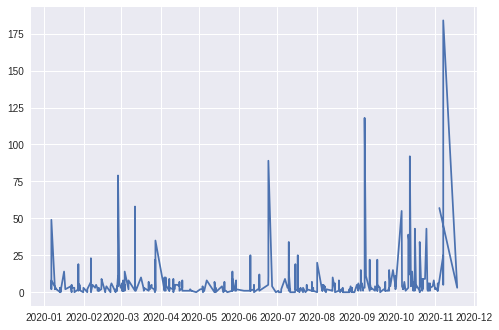

In [25]:
plt.plot(nithya.Timestamp, nithya.Comments)
plt.show;

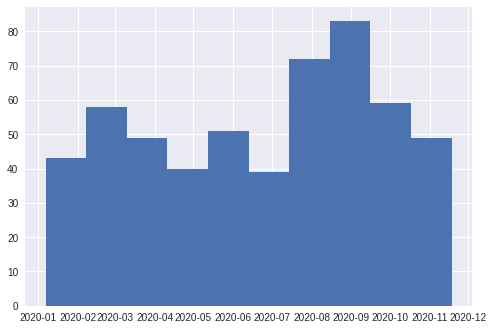

In [26]:
plt.hist(nithya.Timestamp)
plt.show;

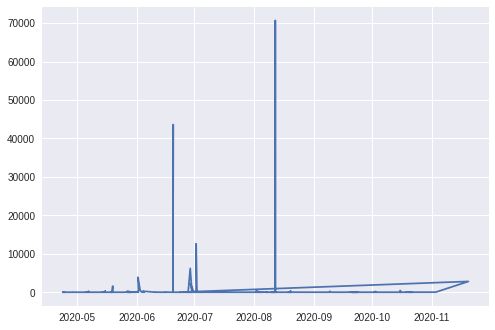

In [27]:
plt.plot(david.Timestamp, david.Comments)
plt.show;

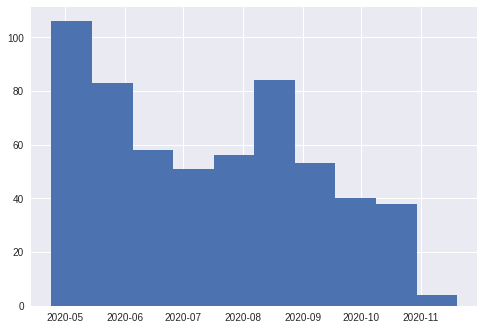

In [28]:
plt.hist(david.Timestamp)
plt.show;

In [40]:
nithya_tr = pd.read_csv('data/nithya_tweets_replies.csv')

In [41]:
nithya_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   UserName   1677 non-null   object
 1   Handle     1674 non-null   object
 2   Timestamp  1677 non-null   object
 3   Text       1671 non-null   object
 4   Emojis     111 non-null    object
 5   Comments   1148 non-null   object
 6   Likes      1268 non-null   object
 7   Retweets   1449 non-null   object
dtypes: object(8)
memory usage: 104.9+ KB


In [42]:
nithya_tr.Comments.loc[nithya_tr.Comments.isin(['2.1K','1.4K', '1.1K', '1.7K', '22.3K'])] = [2100, 1400, 1100, 1400, 1100, 1700, 22300]

In [43]:
nithya_tr.Comments.loc[nithya_tr.Comments.isin(['1.3K'])] = [1300, 1300]

In [44]:
nithya_tr.Comments.loc[nithya_tr.Comments.isin(['1K'])]  = [1000]

In [45]:
nithya_tr.Likes.loc[nithya_tr.Likes.isin(['1.5K', '1.3K', '1.1K', '1K', '2.2K', '1.6K', 
                                          '11.5K', '1.2K',  '1.4K','2.5K', '13.3K', '75.1K', '5.6K',
                                          '2.6K', '16.3K', '308', '355', '532','2.8K', '2.9K', '2K', '1.9K'
                                          ])] = [1500, 1300, 1100, 1000, 2200, 1600, 1500, 1000, 11500, 1200, 1300
                                                , 1500, 1400, 2500, 2500, 2500, 1600, 13300, 75100, 1000, 5600, 2600, 
                                                 16300, 308, 355, 532, 2800, 2900, 2000, 2900, 1900, 2200, 1500,
                                                2500, 2900, 2600, 1300, 1000, 1600, 1900]

In [46]:
nithya_tr.Likes.loc[nithya_tr.Likes.isin(['1.5K', '1.3K', '1.1K', '1K', '2.2K', '1.6K', 
                                          '11.5K', '1.2K',  '1.4K','2.5K', '13.3K', '75.1K', '5.6K',
                                          '2.6K', '16.3K', '308', '355', '532','2.8K', '2.9K', '2K', '1.9K''3.5K', '7.1K', '7K', '5.5K', '3K', '4.3K', '39.3K','51.8K', '35.9K',
                                          '1.7K', '6.9K', '6.5K', '406', '224', '10.8K','6K', '30.4K', '74.9K', 
                                          '4.5K', '31.6K', '8.7K', '5K', '6.6K', '7.9K', '122.2K', '2.3K',
                                          '4.8K', '2.7K', '6.3K', '9.3K', '55.7K','11.6K'])] = [7100, 7000, 5500,
                                                                                               3000, 4300, 39300,
                                                                                               51800, 35900, 1700,
                                                                                               6900, 6500, 406, 224, 10800, 6000, 30400, 74900, 4500, 31600, 8700, 6500, 
                                                                                                5000, 6600, 7900, 122200, 2300, 4800, 2700, 6300, 9300, 55700, 11600, 3000, 
                                                                                                6000, 7100, 4300]

In [47]:
nithya_tr.Likes.loc[nithya_tr.Likes.isin(['23K'])] = [23000]

In [48]:
nithya_tr.Likes.loc[nithya_tr.Likes.isin(['3.5K'])] = [3500, 3500]

In [49]:
nithya_tr.Retweets.loc[nithya_tr.Retweets.isin(['2K', '13K', 
     '1.1K',
       '1.2K', 
       '3.4K',  '2.9K', 
       '2.5K', '5.7K', 
       '1K', '4.1K', '6.2K', '3.7K', 
        '1.8K', 
       '1.9K',  '1.4K',
       ])] = [2000, 13000, 1100, 1200, 3400, 2900, 2500, 5700, 1000, 4100, 6200, 3700, 1200, 1800
             , 1900, 1400, 1000, 1000, 3700, 1200, 1200, 1800, 1000, 1100, 1000, 1000, 1200, 1800, 
             1000, 1000, 1200, 1000, 5700, 1000, 1000, 1400, 1000, 1400, 1400, 1200, 1400, 2500,
             1000, 2500, 1900, 1000, 1000, 1200, 1800, 1100, 1100]
      

In [50]:
nithya_tr.Retweets.loc[nithya_tr.Retweets.isin([ '5K', '1.3K',  '3.1K', '2.7K',  '3.9K', '2.8K', '1.6K', '1.5K',  '3.5K',  '3.8K', '10.9K',
'3.3K',  '2.3K', '2.6K', '7.7K', '5.8K', '52.4K', '4.2K', '4.7K', '51.5K', '149.1K', '26.7K', '11.3K','3.2K', '14.8K',

])] = [5000, 1300, 3100, 1300, 2700, 3900, 2800, 1600, 1300, 1500, 3500, 3800, 10900, 3900, 3300, 2300, 1300
      , 2600, 1500, 7700, 5800, 5800, 52400, 4200, 1500, 4700, 51500, 1300, 149100, 2600, 26700, 11300, 3800, 3200,
      14800, 5000, 3200, 1300, 2300, 1500, 2700, 1500, 1600, 1300, 1500, 1500, 3500, 7700, 2700]

In [51]:
nithya_tr.Retweets.loc[nithya_tr.Retweets.isin([ '1.7K', '8.1K',  '4.5K', '9.6K', '21.6K',  '2.1K', '15.8K','5.3K', '5.5K','13.5K', '32.3K', 
                                                '4.6K', '3K',  '9.8K', '9K', '82K', '116.5K', '2.2K', '99.8K', '6.8K', 
                                                '4.4K', '7.6K', '23.2K', '24.9K','10K', '8.7K', '43.6K', '105.3K', '4.9K', '69.7K', '34.9K', 
                                                '18.8K', '7.5K', '27.6K','9.3K', '209.6K','8.8K', '4.8K', '8.9K', '12.7K','54.1K', '26.4K','17.3K'])] = [1700, 8100, 4500, 9600, 21600, 1700, 
                                                                                                          2100, 1700, 15800, 5300, 5500, 13500, 32300, 4600, 3000, 9800, 9000, 82000, 116500, 
                                                                                                          1700, 2200, 99800, 2200, 6800, 4400, 7600, 23200, 24900, 10000, 8700, 43600, 105300,
                                                                                                          4900, 69700, 34900, 18800, 7500,9300, 27600, 209600, 8800, 4800, 8900, 12700, 
                                                                                                          54100, 26400, 17300]

In [52]:
nithya_tr['Comments'].fillna(0, inplace=True)
nithya_tr['Likes'].fillna(0, inplace=True)
nithya_tr['Retweets'].fillna(0, inplace=True)
nithya_tr.Emojis.fillna('', inplace=True)
nithya_tr.Text.fillna('', inplace=True)

In [53]:
nithya_tr = nithya_tr.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [54]:
nithya_tr = nithya_tr.drop([998,1012,1122])

In [55]:
nithya_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1676
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   1674 non-null   object        
 1   Handle     1674 non-null   object        
 2   Timestamp  1674 non-null   datetime64[ns]
 3   Text       1674 non-null   object        
 4   Emojis     1674 non-null   object        
 5   Comments   1674 non-null   float64       
 6   Likes      1674 non-null   int32         
 7   Retweets   1674 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 104.6+ KB


In [56]:
david_tr = pd.read_csv('data/david_tweets_replies.csv')

In [57]:
david_tr.Comments.loc[david_tr.Comments.isin(['28.2K', '12.6K', '6.2K',
       '43.8K', '3.9K', '1.1K', '1K',  '3.8K', '3.3K', '19.9K'])] = [28200, 12600, 6200, 43800, 3900, 1100, 1000, 3800, 3300, 19900]

In [58]:
david_tr.Likes.loc[david_tr.Likes.isin(['29.6K','7.7K', '4.8K','1.3K',
       '1K', '24.2K', 
       '22.2K', '44.4K',  '47.2K', '3.3K','1.2K', '2K',  '3.1K',
       '1.6K', '21K', '2.5K',  '5.1K', '11.5K',
       '5.3K', '4.3K', '12.6K',
       '80.8K', '1.1K', '130.6K'])] = [29600, 7700, 4800, 1300, 1000, 24200, 22200, 44400, 47200, 3300, 1200, 2000, 3100, 1600, 21000, 2500, 5100, 11500, 5300, 4300, 12600, 80800, 1100, 130600, 2000]

In [59]:
david_tr.Retweets.loc[david_tr.Retweets.isin(['52.7K', '5.2K', '1.2K',
       '26K', '6K', '1.1K', '113.4K', '58.1K', '2.9K', '150.5K', '219K', 
        '12.4K', '1.3K', '6.3K', '1.8K', '11K', 
       '10.2K', '103.1K', '4.6K','1.5K',  '2K', '2.1K',
       '3.1K',  '25.3K',  '36.4K',
        '1K', '6.8K', '46.9K', '261.1K', '15.4K', '2.3K', '2.5K',
       '572.5K',  '4.2K'])]  = [52700, 5200, 1200, 26000, 6000, 1100, 1100, 113400, 58100, 2900, 150500,
                              219000, 12400, 1300, 6300, 1800, 2900, 11000, 10200, 103100, 4600, 1500,
                              1100, 2000, 2100, 3100, 25300, 36400, 1000, 11000, 6800, 46900, 261100,
                               15400, 2300, 2500, 572500, 4200, 1000]

In [60]:
david_tr.Retweets.loc[david_tr.Retweets.isin(['2.2K'])] = [2200, 2200]

In [61]:
david_tr['Comments'].fillna(0, inplace=True)
david_tr['Likes'].fillna(0, inplace=True)
david_tr['Retweets'].fillna(0, inplace=True)
david_tr.Emojis.fillna('', inplace=True)
david_tr.Text.fillna('', inplace=True)

In [62]:
david_tr = david_tr.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [63]:
david_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   2263 non-null   object        
 1   Handle     2263 non-null   object        
 2   Timestamp  2263 non-null   datetime64[ns]
 3   Text       2263 non-null   object        
 4   Emojis     2263 non-null   object        
 5   Comments   2263 non-null   float64       
 6   Likes      2263 non-null   int32         
 7   Retweets   2263 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 123.9+ KB


(array([1., 0., 0., ..., 0., 0., 1.]),
 array([17741.95883102, 17742.33177388, 17742.70471673, ...,
        18585.1826328 , 18585.55557566, 18585.92851852]),
 <BarContainer object of 2263 artists>)

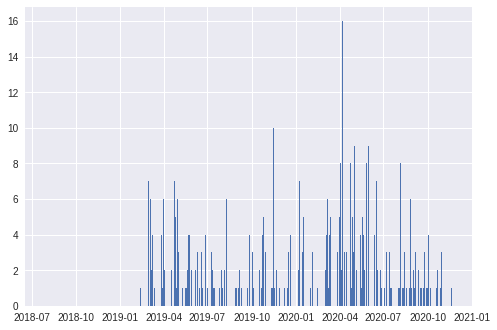

In [64]:
plt.hist(david_tr.Timestamp, david_tr.Timestamp.count())

(array([3., 2., 1., ..., 0., 0., 1.]),
 array([15245.84481481, 15247.83889768, 15249.83298055, ...,
        18579.9513713 , 18581.94545417, 18583.93953704]),
 <BarContainer object of 1674 artists>)

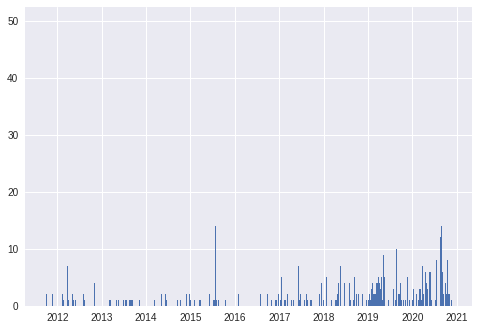

In [65]:
plt.hist(nithya_tr.Timestamp, nithya_tr.Timestamp.count())

In [66]:
nithya_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1676
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   1674 non-null   object        
 1   Handle     1674 non-null   object        
 2   Timestamp  1674 non-null   datetime64[ns]
 3   Text       1674 non-null   object        
 4   Emojis     1674 non-null   object        
 5   Comments   1674 non-null   float64       
 6   Likes      1674 non-null   int32         
 7   Retweets   1674 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 104.6+ KB


In [67]:
old_nithya = pd.read_csv('data/pre2019_nithya.csv')

In [68]:
old_nithya['Comments'].fillna(0, inplace=True)
old_nithya['Likes'].fillna(0, inplace=True)
old_nithya['Retweets'].fillna(0, inplace=True)
old_nithya.Emojis.fillna('', inplace=True)
old_nithya.Text.fillna('', inplace=True)

In [69]:
old_nithya.Retweets.loc[old_nithya.Retweets.isin(['1K', '13K', '2K', '1.1K','1.2K', 
                                                  '3.4K','2.5K', '5.7K', '4.1K', '6.1K', 
                                                  '1.8K', '1.9K', '2.4K',
       '3.1K', '1.3K', '896', '390', '2.7K', '10K', '1.5K', 
        '3.8K', '2.3K', '22K', '3.3K'])] = [1000, 13000, 2000, 2000, 1100, 1200, 3400, 2500, 5700
                                           , 1000, 4100, 6100, 1200, 1800, 1900, 2400, 3100, 1300, 896, 
                                           2500, 390, 2700, 10000, 1200, 1100, 1000, 1500, 1200, 3800, 
                                            1000, 1200, 2300, 2400, 22000, 33000, 2700, 1800]

/home/mario/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [70]:
old_nithya.Retweets.loc[old_nithya.Retweets.isin(['1.6K'])] = [1600]

In [71]:
old_nithya.Likes.loc[old_nithya.Likes.isin(['1.5K', '1.3K', '1.1K', '5.7K', '3K'])] = [1500, 1300, 1100, 1500, 5700, 3000]


In [72]:
old_nithya = old_nithya.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [73]:
old_nithya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   1191 non-null   object        
 1   Handle     1191 non-null   object        
 2   Timestamp  1191 non-null   datetime64[ns]
 3   Text       1191 non-null   object        
 4   Emojis     1191 non-null   object        
 5   Comments   1191 non-null   float64       
 6   Likes      1191 non-null   int32         
 7   Retweets   1191 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 65.3+ KB


In [74]:
old_david = pd.read_csv('data/pre2019_david.csv')

In [75]:
old_david.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserName   3408 non-null   object 
 1   Handle     3408 non-null   object 
 2   Timestamp  3408 non-null   object 
 3   Text       3407 non-null   object 
 4   Emojis     477 non-null    object 
 5   Comments   1253 non-null   float64
 6   Likes      2129 non-null   object 
 7   Retweets   2884 non-null   object 
dtypes: float64(1), object(7)
memory usage: 213.1+ KB


In [76]:
old_david['Comments'].fillna(0, inplace=True)
old_david['Likes'].fillna(0, inplace=True)
old_david['Retweets'].fillna(0, inplace=True)
old_david.Emojis.fillna('', inplace=True)
old_david.Text.fillna('', inplace=True)

In [77]:
old_david.Likes.loc[old_david.Likes.isin(['1.5K',
       '1.6K'])] = [1500, 1600]

In [78]:
old_david.Retweets.loc[old_david.Retweets.isin(['1.2K', '1.9K','2.2K'])] = [1200, 1900, 2200]

In [79]:
old_david = old_david.astype({'Timestamp': 'datetime64', 'Likes': 'int32', 'Retweets': 'int32', 'Comments': 'float64'})

In [80]:
old_david.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   3408 non-null   object        
 1   Handle     3408 non-null   object        
 2   Timestamp  3408 non-null   datetime64[ns]
 3   Text       3408 non-null   object        
 4   Emojis     3408 non-null   object        
 5   Comments   3408 non-null   float64       
 6   Likes      3408 non-null   int32         
 7   Retweets   3408 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 186.5+ KB


In [81]:
nithya = pd.concat([nithya, nithya_tr, old_nithya])

In [82]:
david = pd.concat([david, david_tr, old_david])

In [83]:
david.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6059 entries, 0 to 3407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   6059 non-null   object        
 1   Handle     6059 non-null   object        
 2   Timestamp  6059 non-null   datetime64[ns]
 3   Text       6059 non-null   object        
 4   Emojis     6059 non-null   object        
 5   Comments   6059 non-null   float64       
 6   Likes      6059 non-null   int32         
 7   Retweets   6059 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 378.7+ KB


In [84]:
nithya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 0 to 1190
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   3400 non-null   object        
 1   Handle     3400 non-null   object        
 2   Timestamp  3400 non-null   datetime64[ns]
 3   Text       3400 non-null   object        
 4   Emojis     3400 non-null   object        
 5   Comments   3400 non-null   float64       
 6   Likes      3400 non-null   int32         
 7   Retweets   3400 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 212.5+ KB


(array([ 1.,  1.,  0., ...,  0.,  0., 12.]),
 array([17175.22575231, 17175.64239071, 17176.05902911, ...,
        18590.96303107, 18591.37966947, 18591.79630787]),
 <BarContainer object of 3400 artists>)

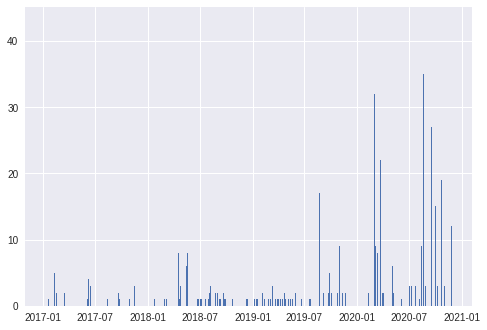

In [94]:
plt.hist(nithya.Timestamp[nithya.Timestamp>'01-01-2017'], nithya.Timestamp.count())

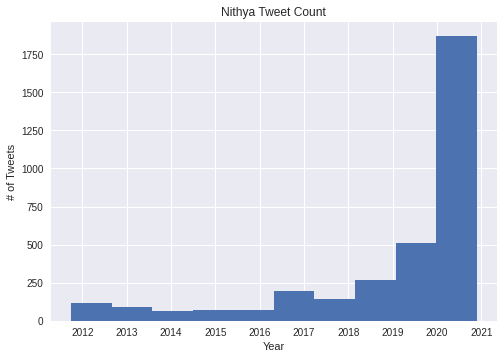

In [97]:
nithya.Timestamp.hist()
plt.xlabel('Year')
plt.ylabel('# of Tweets')
plt.title('Nithya Tweet Count')
plt.savefig('./images/nithya_tweet_count')

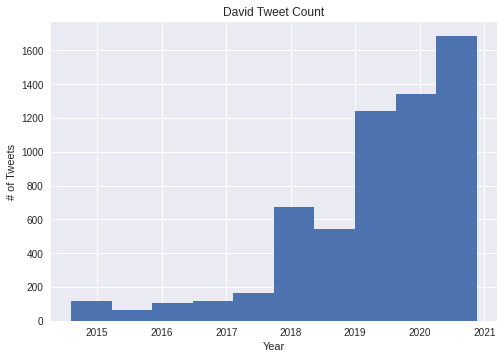

In [99]:
david.Timestamp.hist()
plt.xlabel('Year')
plt.ylabel('# of Tweets')
plt.title('David Tweet Count')
plt.savefig('./images/david_tweet_count')

In [100]:
cands = pd.concat([david, nithya])

In [101]:
cands.Handle.value_counts()

@davideryu         5378
@nithyavraman      2845
@MayorOfLA           57
@LosFelizLedger      34
@LACity              25
                   ... 
@lacdod               1
@JorCru               1
@BikeMetro            1
@JordanPeele          1
@ALookSee             1
Name: Handle, Length: 668, dtype: int64

In [102]:
cands = cands.loc[cands.Handle.isin(['@davideryu', '@nithyavraman'])]

In [103]:
cands['labels'] = np.where(cands.Handle.isin(['@davideryu']), 1, 0)

In [104]:
cands.Handle.value_counts()

@davideryu       5378
@nithyavraman    2845
Name: Handle, dtype: int64

In [105]:
cands.labels.value_counts()

1    5378
0    2845
Name: labels, dtype: int64

In [106]:
cands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8223 entries, 0 to 1190
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   8223 non-null   object        
 1   Handle     8223 non-null   object        
 2   Timestamp  8223 non-null   datetime64[ns]
 3   Text       8223 non-null   object        
 4   Emojis     8223 non-null   object        
 5   Comments   8223 non-null   float64       
 6   Likes      8223 non-null   int32         
 7   Retweets   8223 non-null   int32         
 8   labels     8223 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(4)
memory usage: 578.2+ KB


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [142]:
X_train, X_test, y_train, y_test = train_test_split(cands.Text, cands.labels, stratify=cands.labels)

In [143]:
test_count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word')

In [144]:
test1 = test_count_vect.fit_transform(X_train)

test1.shape

(6167, 15021)

In [145]:
count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', max_features=1000)

In [146]:
count_vect.fit(X_train)

CountVectorizer(max_features=1000, stop_words='english')

In [147]:
X_train_counts = count_vect.transform(X_train)
print("The type of X_train_counts is {0}.".format(type(X_train_counts)))
print("The X matrix has {0} rows (documents) and {1} columns (words).".format(
        X_train_counts.shape[0], X_train_counts.shape[1]))



The type of X_train_counts is <class 'scipy.sparse.csr.csr_matrix'>.
The X matrix has 6167 rows (documents) and 1000 columns (words).


In [148]:


tfidf_transformer = TfidfTransformer(use_idf=True)
tfidf_transformer.fit(X_train_counts)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)



In [149]:
pd.DataFrame(X_train_tfidf.todense(), columns = count_vect.vocabulary_).head()

,new,utility,box,art,hollywood,thanks,check,video,watch,ladotofficial,...,laws,developers,voting,friend,pets,hhh,sites,fast,elementary,addressing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=1)

In [151]:
# cvect = CountVectorizer(lowercase=True, tokenizer=None, stop_words=cust_stop,
#                              analyzer='word', max_features=5000)  # Check out the options!

# document_tf_matrix = cvect.fit_transform(X_train).todense()

# pd.DataFrame(document_tf_matrix, columns = sorted(tf.vocabulary_))

In [152]:

tfidf = TfidfVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', max_features=1000)

document_tfidf_matrix = tfidf.fit_transform(X_train)

tfidf_df = pd.DataFrame(document_tfidf_matrix.todense(), columns = sorted(tfidf.vocabulary_))
tfidf_df

,000,10,100,10am,11,12,13,14,15,16,...,worse,worst,wrote,year,years,yes,yesterday,young,youth,zoo
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,0.0,0.0,0.0,0.0,0.172917,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6163,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6164,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.24343,0.0,0.0,...,0.0,0.0,0.0,0.185702,0.0,0.0,0.0,0.0,0.0,0.0
6165,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
# cross val score/ predict
count_vect_score = cross_val_score(lr, X_train_counts, y_train, cv=5)

count_vect_score.mean()

# 0.9051418250935577

0.9122729740352093

In [154]:

tf_vect_score = cross_val_score(lr, document_tfidf_matrix, y_train, cv=5)

tf_vect_score.mean()

# 0.8924947519654662

0.8924910714403078

In [121]:
def count_vec_ngram(params, X_train, y_train):
    cvec_p = CountVectorizer(ngram_range=(params))
    cvec_p.fit(X_train)
    X_train_cvec_p = cvec_p.transform(X_train)
    count_vect_score = cross_val_score(lr, X_train_cvec_p, y_train, cv=5)
    return count_vect_score.mean()

params = [(1,1), (1,2), (1,3), (1,4)] 

ngram_scores = []

for p in params:
    ngram_scores.append(count_vec_ngram(p, X_train, y_train))

ngram_scores




# ngrams = ['cvec gram_1','cvec gram_2','cvec gram_3','cvec gram_4']
# ngram_df = pd.DataFrame({'params':ngrams, 'scores':ngram_scores}, index=[0,1,2,3])

# sns.pointplot(x='params', y='scores', data = ngram_df)
# plt.ylabel('Accuracy Score')
# plt.xlabel('ngrams')
# plt.xticks(rotation=40)
# plt.show()

[0.9464910793271473,
 0.9479508018944187,
 0.9417886826480327,
 0.9406536349786595]

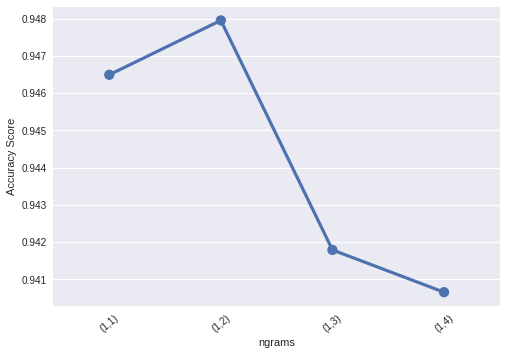

In [129]:
sns.pointplot(x=['(1,1)', '(1,2)', '(1,3)', '(1,4)'], y=ngram_scores)
plt.ylabel('Accuracy Score')
plt.xlabel('ngrams')
plt.xticks(rotation=40)
plt.show()
# plt.savefig('./images/ngram_graph')

In [155]:
count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', max_features=1000, ngram_range=(1,2))

X_train_cvect = count_vect.fit_transform(X_train)

X_test_cvect = count_vect.transform(X_test)

In [156]:
lr = LogisticRegression(random_state=1)

In [157]:
lr.fit(X_train_cvect, y_train)


LogisticRegression(random_state=1)

In [158]:
predicted = lr.predict(X_test_cvect)
accuracy = np.mean(predicted == y_test)

print("\nThe accuracy on the test set is {0:0.3f}.".format(accuracy))


The accuracy on the test set is 0.907.


In [159]:

from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, predicted)
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc_score(y_test, predicted))

plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

ValueError: y_true takes value in {'@davideryu', '@nithyavraman'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [160]:


nb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
nb_model.fit(X_train_cvect, y_train)



MultinomialNB()

In [161]:
nb_model.classes_[0]

'@davideryu'

In [162]:
feature_words = count_vect.get_feature_names()
n = 50 #number of top words associated with the category that we wish to see

for handle in range(len(nb_model.classes_)):
    print(f"\nTarget: {handle}, name: {nb_model.classes_[handle]}")
    log_prob = nb_model.feature_log_prob_[handle]
    i_topn = np.argsort(log_prob)[::-1][:n]
    features_topn = [feature_words[i] for i in i_topn]
    print(f"Top {n} tokens: ", features_topn)




Target: 0, name: @davideryu
Top 50 tokens:  ['http', 'la', 'org', 'city', 'ly', 'join', 'com', 'lacity', 'los', 'today', 'https', 'angeles', 'los angeles', 'bit', 'bit ly', 'lacd4', 'lacity org', 'community', 'thank', 'new', 'help', 'need', 'work', 'housing', 'http bit', 'learn', 'ow', 'ow ly', 'http ow', 'free', 'make', 'park', 'day', 'hollywood', 'great', 'council', 'info', 'support', 'program', 'davidryu', 'time', 'davidryu lacity', 'homelessness', 'rent', 'cd4', 'year', 'people', 'local', 'food', 'thanks']

Target: 1, name: @nithyavraman
Top 50 tokens:  ['la', 'city', 'com', 'people', 'replying', 'http', 'thread', 'housing', 'https', 'homeless', 'council', 'homelessness', 'need', 'just', 've', 'make', 'los', 'like', 'angeles', 'los angeles', 'help', 'nithyaforthecity', 'new', 'campaign', 'nithyaforthecity com', 'org', 'nithya', 'money', 'work', 'city council', 'right', 'latimes', 'time', 'rent', 'today', 'public', 'residents', 'latimes com', 'california', 'street', '000', 'want', 

In [165]:
'''

first adding http, https, com, bit, ow, ly

next adding get, city, reply, replying, org, re, ve

ll

la los angeles us

'''



cust_stop = {'ll','ve','re','get', 'city', 'replying', 'reply', 'org', 'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than', 'bit', 'ly', 'ow', 'http', 'https', 'com'}

In [166]:
from sklearn.pipeline import Pipeline





nb_pipeline = Pipeline([('vect', CountVectorizer(lowercase=True, tokenizer=None, stop_words=cust_stop,
                             analyzer='word', max_features=1000, ngram_range=(1,2))),
                        ('tfidf', TfidfTransformer(use_idf=True)),
                        ('model', MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)),
                        ])

nb_pipeline.fit(X_train, y_train);

In [167]:

predicted = nb_pipeline.predict(X_test)
accuracy = np.mean(predicted == y_test)

print("\nThe accuracy on the test set is {0:0.3f}.".format(accuracy))


The accuracy on the test set is 0.878.


In [312]:
X_test[predicted != y_test]

1101    I wish I had this when I was growing up- Girls...
292     There are risks to building out city-owned bro...
864     Great - let's introduce a motion. Friday?Mike ...
343     Replying to \n@may_gun\n and \n@BLMLAThank you...
891     We cannot let a pandemic make income inequalit...
                              ...                        
1143    Unclaimed reimbursements are the regular donat...
683     Help find Baxter!! \n @JErickson85John Erickso...
455     Lacking documentation doesn’t make you any les...
975     Replying to \n@AbundantHousinghi I couldn't ma...
13                             Replying to \n@therealvali
Name: Text, Length: 263, dtype: object

In [172]:
X_train, X_test, y_train, y_test = train_test_split(cands.Text, cands.labels, stratify=cands.labels)

roc_auc_score for Naive Bayes:  0.940365682137834
roc_auc_score for Logistic Regression:  0.957597812390528


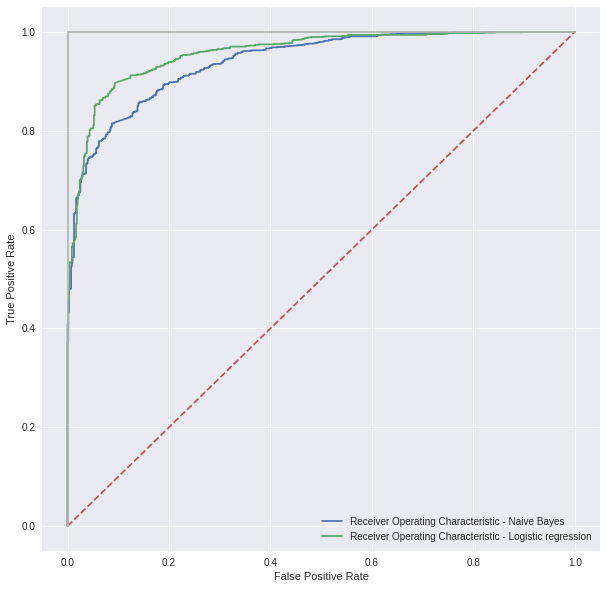

<Figure size 576x396 with 0 Axes>

In [175]:
clf_nb = Pipeline([('vect', CountVectorizer(lowercase=True, tokenizer=None, stop_words=cust_stop,
                             analyzer='word', max_features=1000, ngram_range=(1,2))),
                        ('tfidf', TfidfTransformer(use_idf=True)),
                        ('model', MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)),
                        ]);
clf_reg = Pipeline([
    ('vect', CountVectorizer(lowercase=True, tokenizer=None, stop_words=cust_stop,
                             analyzer='word', max_features=1000, ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', SGDClassifier(loss='log')),
])
;

clf_nb.fit(X_train, y_train); 
clf_reg.fit(X_train, y_train);

y_score1 = clf_nb.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)


print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))



plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate1, true_positive_rate1, label='Receiver Operating Characteristic - Naive Bayes')
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2, label='Receiver Operating Characteristic - Logistic regression')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
plt.savefig('./images/roc_curve')

In [169]:
from pprint import pprint
from time import time
import logging

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV


In [110]:
'''

SGDClassifier defaults to loss 'hinge', which is SVM. Try with loss 'log' first for logistic regression.

'''

"\n\nSGDClassifier defaults to loss 'hinge', which is SVM. Try with loss 'log' first for logistic regression.\n\n"

In [176]:



# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################


print("%d documents" % len(cands.Text))
print("%d categories" % len(cands.Handle.unique()))
print()

# #############################################################################
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='log')),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (1000, 2000, 3000, 5000),
    'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),  # unigrams or bigrams
    'vect__stop_words': ('english', cust_stop),
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
}

# multiprocessing requires the fork to happen in a __main__ protected
# block

# find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(cands.Text, cands.Handle)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

8223 documents
2 categories

pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (1000, 2000, 3000, 5000),
 'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),
 'vect__stop_words': ('english',
                      {'a',
                       'about',
                       'above',
                       'after',
                       'again',
                       'against',
                       'all',
                       'am',
                       'an',
                       'and',
                       'any',
                       'are',
                       'as',
                       'at',
                       'be',
                       'because',
                       'been',
                       'before',
                       'being',
                       'below',
                       'between',
             

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.8min finished


done in 108.847s

Best score: 0.953
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'elasticnet'
	vect__max_df: 1.0
	vect__max_features: 5000
	vect__ngram_range: (1, 1)
	vect__stop_words: 'english'


In [117]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='log'))])

In [119]:
np.mean(pipeline.predict(X_test) == y_test)

0.943579766536965

In [ ]:
'''




ROC curve and AUC



https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html


sklearn.metrics.roc_curve


'''

In [588]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.svm import SVC



In [162]:
# grid_search.cv_results_['mean_test_score']

In [163]:
# def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
#     # Get Test Scores Mean and std for each grid search
#     scores_mean = cv_results['mean_test_score']
#     scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

#     scores_sd = cv_results['std_test_score']
#     scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

#     # Plot Grid search scores
#     _, ax = plt.subplots(1,1)

#     # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
#     for idx, val in enumerate(grid_param_2):
#         ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

#     ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
#     ax.set_xlabel(name_param_1, fontsize=16)
#     ax.set_ylabel('CV Average Score', fontsize=16)
#     ax.legend(loc="best", fontsize=15)
#     ax.grid('on')

# # Calling Method 
# plot_grid_search(grid_search.cv_results_, grid_search.param_grid['vect__max_df'], grid_search.param_grid['vect__max_features'], 'N Estimators', 'Max Features')


In [164]:
# score = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending = False)
# for i in parameters.keys():
#     print(f"{i} has {len(parameters[i])} possible parameters: {parameters[i]}")
# score[i] = score.params.apply(lambda x: x[i])
# l =['mean_test_score'] + list(parameters.keys())
# for i in list(parameters.keys()):
#     sns.swarmplot(data = score.params[l], x = i, y = 'mean_test_score')
#     #plt.savefig('170705_sgd_optimisation//'+i+'.jpg', dpi = 100)
#     plt.show()

In [165]:
# score = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score')


# for i in range(len(score.params)):
#     sns.swarmplot(data=score, y='mean_test_score')

In [166]:
# l =['mean_test_score'] + list(parameters.keys())

# score

In [167]:
# _, ax = plt.subplots(figsize=(10,10))

# # # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
# for idx, val in enumerate(score.mean_test_score):
#     print(score.param_vect__max_features[idx], score.mean_test_score[idx])


In [114]:
# score

In [219]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################


print("%d documents" % len(cands.Text))
print("%d categories" % len(cands.Handle.unique()))
print()

# #############################################################################
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (1000, 2000, 3000, 5000),
    'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),  # unigrams or bigrams
    'vect__stop_words': ('english', cust_stop),
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
}

# multiprocessing requires the fork to happen in a __main__ protected
# block

# find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(cands.Text, cands.Handle)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

8223 documents
2 categories

pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (1000, 2000, 3000, 5000),
 'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),
 'vect__stop_words': ('english',
                      {'a',
                       'about',
                       'above',
                       'after',
                       'again',
                       'against',
                       'all',
                       'am',
                       'an',
                       'and',
                       'any',
                       'are',
                       'as',
                       'at',
                       'be',
                       'because',
                       'been',
                       'before',
                       'being',
                       'below',
                       'between',
             

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.8min finished


done in 108.871s

Best score: 0.949
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'elasticnet'
	vect__max_df: 0.5
	vect__max_features: 5000
	vect__ngram_range: (1, 3)
	vect__stop_words: 'english'


In [168]:
import os

from sklearn.cluster import KMeans
from collections import Counter
from scipy.spatial.distance import pdist, squareform

from scipy.cluster.hierarchy import linkage, dendrogram


In [173]:
vectorizer = TfidfVectorizer(stop_words=cust_stop, max_df=.7, max_features=3000, ngram_range=(1,2))
X = vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()

features

['00',
 '000',
 '000 people',
 '01',
 '02',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '10 000',
 '100',
 '101',
 '10am',
 '10k',
 '11',
 '11am',
 '12',
 '12 months',
 '12pm',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '19 emergency',
 '19 outbreak',
 '19 pandemic',
 '1pm',
 '1st',
 '20',
 '20 years',
 '200',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2020 20',
 '2020 pdf',
 '2020census',
 '2030',
 '21',
 '213',
 '213 473',
 '22',
 '23',
 '24',
 '25',
 '25th',
 '26',
 '27',
 '27th',
 '28',
 '29',
 '29th',
 '2nd',
 '2pm',
 '30',
 '30 million',
 '30 pm',
 '30 years',
 '300',
 '30am',
 '30pm',
 '30th',
 '31',
 '311',
 '323',
 '3pm',
 '3rd',
 '40',
 '405',
 '41',
 '41 18',
 '473',
 '473 7004',
 '4pm',
 '4th',
 '50',
 '500',
 '5k',
 '5pm',
 '5th',
 '60',
 '600',
 '6pm',
 '6th',
 '7004',
 '7pm',
 '7th',
 '80',
 '800',
 '8am',
 '8pm',
 '8th',
 '90',
 '9am',
 'a3pcon',
 'aapi',
 'aapi community',
 'aapiheroes',
 'ability',
 'able',
 'absolutely',
 '

In [174]:
kmeans = KMeans()
kmeans.fit(X)

KMeans()

In [175]:
# Find the top 10 features for each cluster.
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("Top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}. {', '.join(features[i] for i in centroid)}")

Top features (words) for each cluster:
0. la, today, new, great, support, us, happy, make, like, council
1. thank, lacorps, lacd4, griffith, park, griffith park, clean, work, cleanscene, great
2. la, covid, many, workers, covid 19, small, 19, people, businesses, business
3. housing, homeless, homelessness, people, services, la, crisis, affordable, affordable housing, need
4. lacity, davidryu, davidryu lacity, issues lacity, cd4 issues, cd4, issues, press release, release, press
5. los angeles, los, angeles, la, hate, today, join, county, jewish, new
6. rent, forgiveness, mortgage, rent mortgage, rent forgiveness, landlords, tenants, eviction, freeze, need
7. join, community, us, join us, rsvp, info, learn, tomorrow, lacd4, art


In [176]:
print("random sample of tweets in each cluster")
assigned_cluster = kmeans.transform(X).argmin(axis=1)

for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    sample_tweets = np.random.choice(cluster, 3, replace=False)
    
    print(f"cluster {i}:")
    for tweet in sample_tweets:
        print(f"{cands[['Handle']].iloc[tweet]}" + '\n' +  f"{cands[['Text']].iloc[tweet]}" + '\n')

random sample of tweets in each cluster
cluster 0:
Handle    @davideryu
Name: 900, dtype: object
Text    Today we had a chance to advance real, wholesa...
Name: 900, dtype: object

Handle    @davideryu
Name: 2634, dtype: object
Text    We're crashing the party.\n@NBCLA\n: "City Off...
Name: 2634, dtype: object

Handle    @davideryu
Name: 2373, dtype: object
Text    The signs of human trafficking are all around ...
Name: 2373, dtype: object

cluster 1:
Handle    @davideryu
Name: 220, dtype: object
Text    Bring the Hollywood Bowl experience home! Jame...
Name: 220, dtype: object

Handle    @davideryu
Name: 252, dtype: object
Text    Had a great time talking with a group of young...
Name: 252, dtype: object

Handle    @davideryu
Name: 315, dtype: object
Text    Today we unveiled a 148-foot mural for Black l...
Name: 315, dtype: object

cluster 2:
Handle    @nithyavraman
Name: 74, dtype: object
Text    Bernie Sanders has endorsed us in our LA City ...
Name: 74, dtype: object

Handle    @d

In [177]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = cands.iloc[cluster].dropna()
    most_common = Counter(topics.Handle).most_common()

    print(f"Cluster {i}:")
    for j in range (len(most_common)):
        print(f"     {most_common[j]}")

Cluster 0:
     ('@davideryu', 2508)
     ('@nithyavraman', 382)
Cluster 1:
     ('@davideryu', 363)
     ('@nithyavraman', 40)
Cluster 2:
     ('@davideryu', 560)
     ('@nithyavraman', 82)
Cluster 3:
     ('@davideryu', 482)
     ('@nithyavraman', 72)
Cluster 4:
     ('@davideryu', 243)
     ('@nithyavraman', 34)
Cluster 5:
     ('@davideryu', 400)
     ('@nithyavraman', 55)
Cluster 6:
     ('@davideryu', 178)
     ('@nithyavraman', 25)
Cluster 7:
     ('@davideryu', 642)
     ('@nithyavraman', 101)


In [178]:
string = []
for t in features:
    if t not in cust_stop:
        string.append(t)
string = pd.Series(string).str.cat(sep=' ')


In [179]:
string

'00 000 000 people 01 02 04 05 06 07 08 09 10 10 000 100 101 10am 10k 11 11am 12 12 months 12pm 13 14 15 16 17 18 19 19 emergency 19 outbreak 19 pandemic 1pm 1st 20 20 years 200 2013 2014 2015 2016 2017 2018 2019 2020 2020 20 2020 pdf 2020census 2030 21 213 213 473 22 23 24 25 25th 26 27 27th 28 29 29th 2nd 2pm 30 30 million 30 pm 30 years 300 30am 30pm 30th 31 311 323 3pm 3rd 40 405 41 41 18 473 473 7004 4pm 4th 50 500 5k 5pm 5th 60 600 6pm 6th 7004 7pm 7th 80 800 8am 8pm 8th 90 9am a3pcon aapi aapi community aapiheroes ability able absolutely abuse academy accept accepted accepting access access centers accessible according account accountability accountable accounts accurate acres across across country across la across lacd4 across los across us act acting action active activism activist activists activities acts actually add addiction address addressing administration admission adopt adoption ads adult adults advance advocacy advocate advocates advocating affairs affect affected af

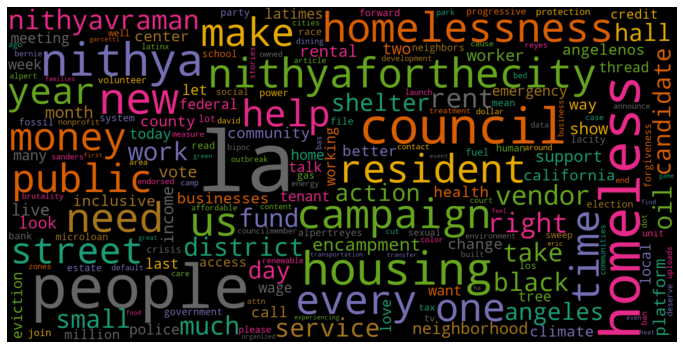

In [636]:

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='Dark2').generate(string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [182]:
cvec = CountVectorizer(stop_words=cust_stop)

cvec.fit(cands.Text)

nithya_doc_matrix = cvec.transform(cands[cands.Handle == '@nithyavraman'].Text)
david_doc_matrix = cvec.transform(cands[cands.Handle == '@davideryu'].Text)
nithya_tf = np.sum(nithya_doc_matrix,axis=0)
david_tf = np.sum(david_doc_matrix,axis=0)
nith = np.squeeze(np.asarray(nithya_tf))
dav = np.squeeze(np.asarray(david_tf))
term_freq_df = pd.DataFrame([nith,dav],columns=cvec.get_feature_names()).transpose()

In [183]:
term_freq_df['total'] = term_freq_df.sum(axis=1)

In [184]:
term_freq_df

,0,1,total
00,3,12,15
000,139,87,226
0001,0,2,2
0002,0,2,2
002,0,1,1
...,...,...,...
한인,0,3,3
합니다,0,2,2
해를,0,1,1
혹은,0,2,2


In [185]:
'''

How cleaning text affects frequency distribution shown in contrast to expected zipf

'''

'\n\nHow cleaning text affects frequency distribution shown in contrast to expected zipf\n\n'

Text(0.5, 1.0, 'Top 300 tokens in tweets')

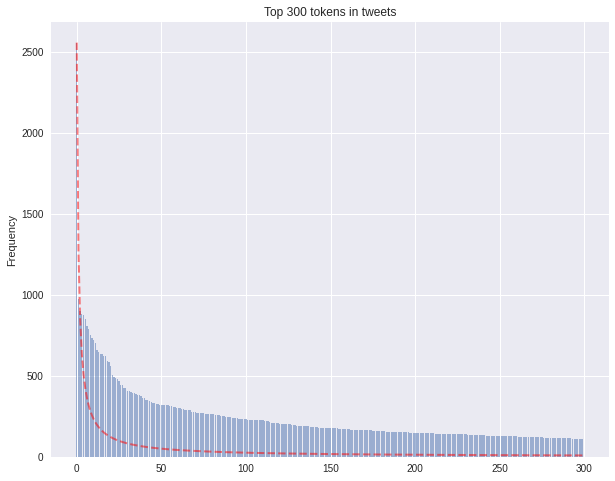

In [186]:
y_pos = np.arange(300)
plt.figure(figsize=(10,8))

expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1) for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:300], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 300 tokens in tweets')

In [187]:
term_freq_df.sort_values(by='total', ascending=False)['total'][:300]

la           2556
los           972
people        901
angeles       883
join          878
             ... 
needed        112
available     112
connect       111
look          109
budget        109
Name: total, Length: 300, dtype: int64

In [ ]:
'''

https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-3-zipfs-law-data-visualisation-fc9eadda71e7

'''

In [182]:
'''

Accuracy driven models overpredict majorty class! From lecture on 11/5 afternoon

Stratifying

Change point weighting



Live import new tweets to Amazon S3, use that for SGD model training

Neural network? See notes on CNN with soft cluster output (study hall)

TensorFlow or Keras

Time series

Random Forest

'''

'\n\nAccuracy driven models overpredict majorty class! From lecture on 11/5 afternoon\n\nStratifying\n\nChange point weighting\n\n\n'

In [177]:


# see a 2d representation of the data using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [178]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

In [179]:
tfidf = TfidfVectorizer(lowercase=True, tokenizer=None, stop_words=cust_stop,
                             analyzer='word')  # Checkout out the options!

document_tfidf_matrix = tfidf.fit_transform(cands.Text)

tfidf_df = pd.DataFrame(document_tfidf_matrix.todense(), columns = sorted(tfidf.vocabulary_))
tfidf_df

,00,000,0001,0002,002,0044,00am,00pm,01,0147,...,통행,프라임뉴스,하실,한가위,한국계,한인,합니다,해를,혹은,확인하실길
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
X_scaled = scaler.fit_transform(tfidf_df) # standardize data

pca = PCA() 
X_pca = pca.fit_transform(X_scaled) 

In [181]:
X_pca.shape

(8223, 8223)

In [193]:
X_pca

array([[-1.32895881e-01,  6.07806858e-01, -1.61291616e-01, ...,
        -1.68889504e-53,  2.81197842e-51, -2.04688509e-51],
       [-1.18865940e-01, -7.53609295e-02, -9.36033259e-02, ...,
        -4.23231197e-32,  7.46356287e-33,  1.09312544e-32],
       [-8.76360912e-02, -8.84444675e-02, -1.57754785e-01, ...,
         1.44204621e-31, -2.54300785e-32, -3.72453027e-32],
       ...,
       [-9.56860487e-02, -4.09064720e-02, -9.89056200e-02, ...,
        -2.80443750e-31,  4.94554649e-32,  7.24332707e-32],
       [-9.48747009e-02, -5.70955122e-02, -7.05848676e-02, ...,
        -1.83309034e-31,  3.23260316e-32,  4.73452267e-32],
       [-9.40494193e-02, -5.44914989e-02, -9.34282911e-02, ...,
         4.86298264e-33, -8.57573282e-34, -1.25601565e-33]])

In [ ]:
'''

Pickle this PCA? Long time to fit_transform

'''

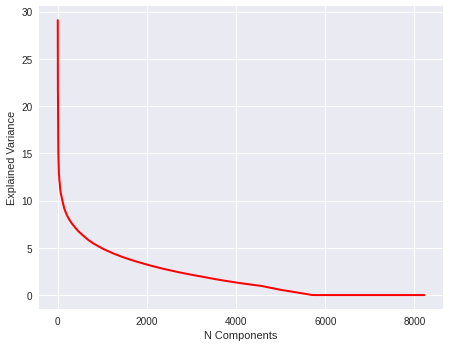

In [184]:


# plot explained variance ratio in a scree plot
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2, color='red')
plt.axis('tight')
plt.xlabel('N Components')
plt.ylabel('Explained Variance');



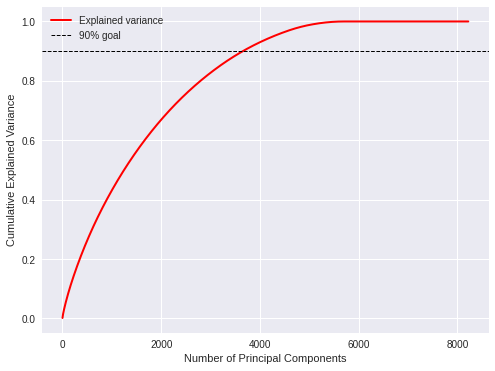

In [185]:


total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('Cumulative Explained Variance')
ax.set_xlabel('Number of Principal Components')
ax.legend();



In [ ]:
'''

Cosine similarity over time

'''

In [256]:
# from sklearn.metrics.pairwise import cosine_similarity



In [198]:
tfidf2 = TfidfVectorizer(strip_accents='ascii', stop_words=cust_stop, max_features=3000)  # Checkout out the options!

document_tfidf_matrix2 = tfidf2.fit_transform(X_train)

tfidf_df2 = pd.DataFrame(document_tfidf_matrix2.todense(), columns = sorted(tfidf2.vocabulary_))
tfidf_df2

,00,000,01,02,04,05,06,07,08,09,...,youre,youth,youtu,youtube,youve,zero,zones,zoning,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190274,0.0
6163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# # Calculate Distance of TF-IDF Vectors
# dist_matrix2 = cosine_similarity(tfidf_df2)

# # Turn it into a DataFrame
# dist_df2 = pd.DataFrame(dist_matrix2)

# dist_df2

In [196]:
'''

biplots over time showing aggregate grouping, are PCs ordered by importance?






HAVE TO SORT BY MOST IMPORTANT PCS, THEN RUN OVER TIME

'''


'\n\nbiplots over time showing aggregate grouping, are PCs ordered by importance?\n\n\n\n\n\n\nHAVE TO SORT BY MOST IMPORTANT PCS, THEN RUN OVER TIME\n\n'

In [199]:
dat = tfidf_df2

top_words = pd.Series(dat.sum(axis=0)).sort_values(ascending=False).index

top_words

Index(['la', 'thank', 'join', 'us', 'today', 'people', 'los', 'lacd4',
       'housing', 'lacity',
       ...
       'charges', 'guilty', 'chains', 'poisons', 'novel', 'ilsr', 'gosdinski',
       'julio', '3a', '2c'],
      dtype='object', length=3000)

In [ ]:

cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

clr = cmap(norm(z))

z = np.where(cands.Handle=='@nithyavraman', .75, .25)


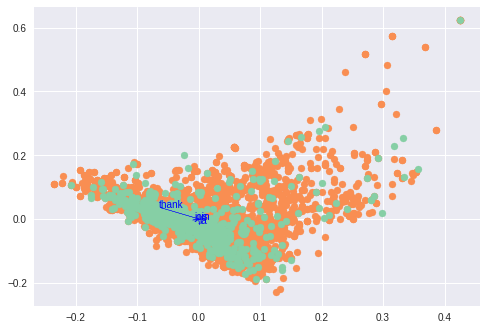

In [201]:
n = len(dat.columns)

pca1 = PCA(n_components = 30)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca1.fit(dat)



## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca1.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca1.components_[1]

xs = pca1.transform(dat)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca1.transform(dat)[:,1]





## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*3*max(xs), yvector[i]*3*max(ys),
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*3.3, yvector[i]*max(ys)*3.3,
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs[i], ys[i], color = clr[i])
#     plt.text(xs[i]*1.1, ys[i]*1.1, list(dat.index)[i], color='b')

plt.show()

In [267]:
# Nithya is green, david is orange

pca1.components_ #.explained_variance_

(30, 50)

In [272]:
principalDf = pd.DataFrame(data = X_pca[:,:2] , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-0.130942,0.610765
1,-0.116604,-0.073587
2,-0.092444,-0.092302
3,-0.123908,0.001789
4,-0.119036,-0.077245
...,...,...
8218,-0.065378,-0.025050
8219,-0.133489,-0.074691
8220,-0.093173,-0.038557
8221,-0.092616,-0.055441


In [273]:
dat.columns.values

array(['19', 'angeles', 'california', 'city', 'community', 'council',
       'day', 'first', 'food', 'free', 'get', 'great', 'help',
       'hollywood', 'homeless', 'homelessness', 'housing', 'info', 'join',
       'know', 'la', 'lacd4', 'lacity', 'latimes', 'learn', 'like',
       'local', 'los', 'make', 'many', 'need', 'new', 'one', 'org',
       'park', 'people', 'program', 'public', 're', 'rent', 'replying',
       'support', 'thank', 'thread', 'time', 'today', 'us', 'work',
       'would', 'year'], dtype=object)

In [327]:
max(ys)

0.6593986177339152

In [298]:
pca1.components_.shape

(30, 50)

,also,angeles,california,campaign,city,could,council,crisis,even,get,...,support,thank,thread,time,today,us,want,work,workers,would
0,0.0,0.0,0.0,0.748697,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.449464,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.498279,0.315439,0.0,0.000000,0.0,0.0,0.000000,...,0.534492,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.406197,0.0,0.593992,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.392418,0.0,0.000000,0.0,0.0,0.296657,...,0.000000,0.340841,0.0,0.0,0.0,0.000000,0.339747,0.622169,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3404,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3405,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3406,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.588870,0.000000,0.000000,0.0,0.0


In [311]:
# cmap = plt.cm.Spectral
# norm = plt.Normalize(vmin=0, vmax=1)

# z = np.where(y_train=='@nithyavraman', .75, .25)
# plt.scatter(xs,ys, c = cmap(norm(z)))


# Nithya is green, david is orange

In [340]:
from sklearn.decomposition import NMF

In [343]:
def top_tokens_nmf(H, tokens, num_tokens, from_sk=True, print_=False):
    H_top_idx = H.argsort()[:,-1:-(num_tokens+1):-1]
    top_tokens = np.full((10,num_tokens), 'Temp String', dtype='object')
    for topic, row in enumerate(H_top_idx):
        if from_sk:
            top_tokens[topic,:] = tokens[row].tolist()
        else:
            top_tokens[topic,:] = tokens[row][0].tolist()
        if print_:
            print(f'Topic {topic+1}:')
            print(f"{', '.join([token for token in top_tokens[topic,:]])}\n")
    return top_tokens

In [351]:
tf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

all_X = tf_vectorizer.fit_transform(cands.Text).todense()

tokens = np.array(tf_vectorizer.get_feature_names())

In [336]:
nmf = NMF(n_components=10, init='random')
nmf.fit(X)

NMF(init='random', n_components=10)

In [360]:
tokens

(5000,)

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X_train_tfidf)
# Xtemp=scaler.transform(X_train_tfidf)    
# pca = PCA(n_components=1000)
# x_new = pca.fit_transform(Xtemp)

# def myplot(score,coeff,labels=None):
#     xs = score[:,0]
#     ys = score[:,1]
#     n = coeff.shape[0]
#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
#     plt.scatter(xs * scalex,ys * scaley, c = y)
#     for i in range(n):
#         plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
#         if labels is None:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
#         else:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
#     plt.xlim(-1,1)
#     plt.ylim(-1,1)
#     plt.xlabel("PC{}".format(1))
#     plt.ylabel("PC{}".format(2))
#     plt.grid()

#Call the function. Use only the 2 PCs.

# myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
# plt.show()

In [369]:
np.transpose(pca.components_[0,1])

-0.056494490382553664

In [365]:
xvector

array([-0.00226151, -0.05649449, -0.0265672 , -0.04309391, -0.25290951,
       -0.01311341, -0.09672075, -0.02163296,  0.0091806 , -0.02810463,
       -0.03960689, -0.0277941 , -0.04587503, -0.02788627, -0.19124922,
       -0.03984894, -0.0078683 , -0.06068393, -0.03862198, -0.02751611,
       -0.02974381,  0.01014925, -0.03044805, -0.04746109, -0.0633555 ,
       -0.06224306,  0.0151785 , -0.02936466, -0.05647714, -0.07503305,
       -0.02471011, -0.02170693, -0.00365982, -0.02374283,  0.9076153 ,
       -0.03123266, -0.01999046, -0.00872558, -0.0434324 , -0.02669701,
       -0.0085481 ,  0.02247305, -0.08459601, -0.0102656 , -0.03689334,
       -0.08903751, -0.02376085, -0.02595894, -0.0143947 ,  0.00322042])

In [ ]:
'''

https://github.com/dr-rodriguez/The-Divided-States-of-America/blob/master/analysis.py

http://strakul.blogspot.com/2016/07/data-science-principal-component.html

https://www.mwbrady.com/post/textasvectors/

https://towardsdatascience.com/introduction-to-text-representation-and-similarity-b5dd3fd71737

'''

In [449]:
def make_biplot(self, xval=0, yval=1, max_arrow=0.2, save=False, alpha=0.4, use_sns=False):
        """
        Create a biplot of the PCA components
        :param xval: PCA component for the x-axis
        :param yval: PCA component for the y-axis
        :param max_arrow: Scaling to control how many arrows are plotted
        :param save: Filename or False if no save needed
        :param alpha: Transparency
        :return:
        """

        # Check if pca has been run
        if self.pcscores is None:
            print('Run PCA first')
            return

        n = self.loadings.shape[1]
        scalex = 1.0 / (self.pcscores.iloc[:, xval].max() - self.pcscores.iloc[:, xval].min())  # Rescaling to be from -1 to +1
        scaley = 1.0 / (self.pcscores.iloc[:, yval].max() - self.pcscores.iloc[:, yval].min())

        if use_sns:
            # Use seaborn
            cut = 120
            g = sns.JointGrid(x=self.pcscores.iloc[:, xval][self.labels == 0] * scalex,
                              y=self.pcscores.iloc[:, yval][self.labels == 0] * scaley)
            g.plot_joint(plt.scatter, c='blue', label='Hillary Clinton', alpha=alpha)
            g.plot_marginals(sns.kdeplot, shade=True, color='blue', cut=cut)
            # g.plot_marginals(sns.distplot, color='blue')

            g.x = self.pcscores.iloc[:, xval][self.labels == 1] * scalex
            g.y = self.pcscores.iloc[:, yval][self.labels == 1] * scaley
            g.plot_joint(plt.scatter, c='red', label='Donald Trump', alpha=alpha)
            plt.legend(loc='best')
            g.plot_marginals(sns.kdeplot, shade=True, color='red', legend=False, cut=cut)
            # g.plot_marginals(sns.distplot, color='red')

            g.x, g.y = [], []
            g.plot_joint(plt.scatter)

            # Draw arrows
            for i in range(n):
                # Only plot the longer ones
                length = sqrt(self.loadings.iloc[xval, i] ** 2 + self.loadings.iloc[yval, i] ** 2)
                if length < max_arrow:
                    continue

                plt.arrow(0, 0, self.loadings.iloc[xval, i], self.loadings.iloc[yval, i], color='g', alpha=0.9)
                plt.text(self.loadings.iloc[xval, i] * 1.15, self.loadings.iloc[yval, i] * 1.15,
                         self.loadings.columns.tolist()[i], color='k', ha='center', va='center')

            plt.xlim(-1, 1)
            plt.ylim(-1, 1)
            plt.xlabel('PC{}'.format(xval + 1))
            plt.ylabel('PC{}'.format(yval + 1))
            if save: g.savefig(save)
            plt.show()
        else:
            plt.figure()
            if self.labels is not None:
                plt.plot(self.pcscores.iloc[:, xval][self.labels == 0] * scalex, self.pcscores.iloc[:, yval][self.labels == 0] * scaley,
                         'bo', alpha=alpha, label='Hillary Clinton')
                plt.plot(self.pcscores.iloc[:, xval][self.labels == 1] * scalex, self.pcscores.iloc[:, yval][self.labels == 1] * scaley,
                         'ro', alpha=alpha, label='Donald Trump')
            else:
                plt.plot(self.pcscores.iloc[:, xval] * scalex, self.pcscores.iloc[:, yval] * scaley,
                         'bo', alpha=alpha)

            for i in range(n):
                # Only plot the longer ones
                length = sqrt(self.loadings.iloc[xval, i]**2 + self.loadings.iloc[yval, i]**2)
                if length < max_arrow:
                    continue

                plt.arrow(0, 0, self.loadings.iloc[xval, i], self.loadings.iloc[yval, i], color='g', alpha=0.9)
                plt.text(self.loadings.iloc[xval, i] * 1.15, self.loadings.iloc[yval, i] * 1.15,
                         self.loadings.columns.tolist()[i], color='k', ha='center', va='center')

            plt.xlim(-1, 1)
            plt.ylim(-1, 1)
            plt.xlabel('PC{}'.format(xval+1))
            plt.ylabel('PC{}'.format(yval+1))
            if self.labels is not None: plt.legend(loc='best', numpoints=1)
            plt.grid()
            if save: plt.savefig(save)
            plt.show()

In [307]:
cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

In [443]:
# https://stackoverflow.com/questions/57340166/how-to-plot-the-pricipal-vectors-of-each-variable-after-performing-pca

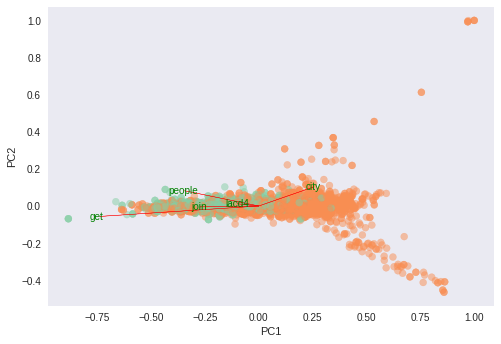

In [417]:
scaler = StandardScaler()
scaler.fit(dat)
X=scaler.transform(dat)

pca2 = PCA(n_components=30)
pca2.fit(X,y_train)
x_new = pca2.transform(X)   

cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

def myplot(score,coeff,n,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    

    plt.scatter(xs/max(xs) ,ys/max(ys), c = cmap(norm(z)),alpha = 0.5) #with scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*20, coeff[i,1]*20,color = 'r')
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 20.5, coeff[i,1] * 20.5, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(x_new[:,0:2], pca2.components_.T, 5, labels=top_words) 
plt.show()


# Nithya is green, david is orange (CHANGE ALPHA)

In [202]:
'''

inverse transform

pca.inver

'''

v=np.array([1] + [0]*8222)



In [203]:
np.argmax(pca.inverse_transform(v))

7027

In [204]:
[(k, v) for k,v in tfidf.vocabulary_.items() if v==7029]

[('gpmountainlion', 7029)]

In [205]:
dat.columns.values

array(['00', '000', '01', ..., 'zoning', 'zoo', 'zoom'], dtype=object)

In [206]:
'''
* pickle and TEST models

* confusion matrix

* graph of accuracy over time

* PCA graph over time (monthly?)
    * how to interpret data


From Skyler:
    * Random Forest and Gradient Boosted
        * XGBoost?

    * Ensemble
    
* CNN??
    
* Sentiment Analysis (see https://github.com/dr-rodriguez/The-Divided-States-of-America/blob/master/analysis.py)

* S3 for new tweets?

'''

'\n* pickle and TEST models\n\n* confusion matrix\n\n* graph of accuracy over time\n\n* PCA graph over time (monthly?)\n    * how to interpret data\n\n\nFrom Skyler:\n    * Random Forest and Gradient Boosted\n        * XGBoost?\n\n    * Ensemble\n    \n* CNN??\n    \n* Sentiment Analysis (see https://github.com/dr-rodriguez/The-Divided-States-of-America/blob/master/analysis.py)\n\n* S3 for new tweets?\n\n'

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', max_features=3000, ngram_range=(1,2))

X_train_cvect = count_vect.fit_transform(X_train)

X_test_cvect = count_vect.transform(X_test)

In [194]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True)

rf.fit(X_train_cvect, y_train)

RandomForestClassifier(oob_score=True)

In [195]:
print(rf.oob_score_)

0.9404897032592833


In [196]:
y_byrf = rf.predict(X_test_cvect)

In [197]:

accuracy = np.mean(y_byrf == y_test)

print("\nThe accuracy on the test set is {0:0.3f}.".format(accuracy))


The accuracy on the test set is 0.926.


In [200]:
X_train, X_test, y_train, y_test = train_test_split(cands.Text, cands.labels, stratify=cands.labels)

LogisticRegression()


Validation result for 1000 features
null accuracy: 100.00
accuracy score: 90.27
model is 9.73 less accurate than null accuracy
train and test time: 0.29
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 100.00
accuracy score: 90.71
model is 9.29 less accurate than null accuracy
train and test time: 0.30
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 100.00
accuracy score: 91.15
model is 8.85 less accurate than null accuracy
train and test time: 0.32
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 100.00
accuracy score: 91.05
model is 8.95 less accurate than null accuracy
train and test time: 0.32
--------------------------------------------------------------------------------
Validation result for 5000 features
null 

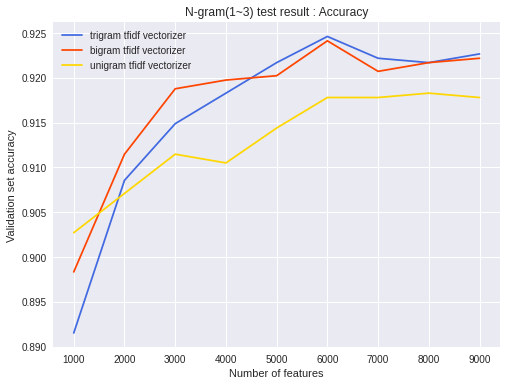

In [188]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == "@nithyavraman"]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}".format(null_accuracy*100))
    print("accuracy score: {0:.2f}".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f} more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f} less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(1000,10000,1000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

tvec = TfidfVectorizer()

feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))


nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
# plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
# plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
# plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [201]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

# names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
#          "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]

names = ["Logistic Regression", "Linear SVC", "Multinomial NB", "Random Forest", "AdaBoost", "XGBoost"]


# classifiers = [
#     LogisticRegression(),
#     LinearSVC(),
#     Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
#   ('classification', LinearSVC(penalty="l2"))]),
#     MultinomialNB(),
#     BernoulliNB(),
#     RidgeClassifier(),
#     AdaBoostClassifier(),
#     Perceptron(),
#     PassiveAggressiveClassifier(),
#     NearestCentroid()
#     ]

classifiers = [
    LogisticRegression(),
    LinearSVC(),
    MultinomialNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
    ]

zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=3000, stop_words=cust_stop, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,clf_accuracy,tt_time))
    return result

bigram_result = classifier_comparator(n_features=3000,ngram_range=(1,2))

Validation result for Logistic Regression
LogisticRegression()


/home/mario/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


null accuracy: 65.42
accuracy score: 91.39
model is 25.97 more accurate than null accuracy
train and test time: 0.56
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC()


/home/mario/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


null accuracy: 65.42
accuracy score: 94.70
model is 29.28 more accurate than null accuracy
train and test time: 0.51
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB()
null accuracy: 65.42
accuracy score: 89.88
model is 24.46 more accurate than null accuracy
train and test time: 0.50
--------------------------------------------------------------------------------
Validation result for Random Forest
RandomForestClassifier()


/home/mario/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


null accuracy: 65.42
accuracy score: 93.24
model is 27.82 more accurate than null accuracy
train and test time: 2.57
--------------------------------------------------------------------------------
Validation result for AdaBoost
AdaBoostClassifier()


/home/mario/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


null accuracy: 65.42
accuracy score: 83.22
model is 17.80 more accurate than null accuracy
train and test time: 1.06
--------------------------------------------------------------------------------
Validation result for XGBoost
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


/home/mario/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


null accuracy: 65.42
accuracy score: 91.78
model is 26.36 more accurate than null accuracy
train and test time: 0.95
--------------------------------------------------------------------------------


In [215]:
dated_cands = cands.set_index(['Timestamp'])

In [216]:
aug2019 = dated_cands.loc['2019-08-01':'2019-09-01']
sep2019 = dated_cands.loc['2019-09-01':'2019-10-01']
oct2019 = dated_cands.loc['2019-10-01':'2019-11-01']
nov2019 = dated_cands.loc['2019-11-01':'2019-12-01']
dec2019 = dated_cands.loc['2019-12-01':'2020-01-01']

In [217]:
jan2020=dated_cands.loc['2020-01-01':'2020-02-01']
feb2020=dated_cands.loc['2020-02-01':'2020-03-01']
mar2020=dated_cands.loc['2020-03-01':'2020-04-01']
apr2020=dated_cands.loc['2020-04-01':'2020-05-01']
may2020=dated_cands.loc['2020-05-01':'2020-06-01']
jun2020=dated_cands.loc['2020-06-01':'2020-07-01']
jul2020=dated_cands.loc['2020-07-01':'2020-08-01']
aug2020=dated_cands.loc['2020-08-01':'2020-09-01']
sep2020=dated_cands.loc['2020-09-01':'2020-10-01']
oct2020=dated_cands.loc['2020-10-01':'2020-11-01']
nov2020=dated_cands.loc['2020-11-01':'2020-12-01']

In [218]:
dated_list = [aug2019, sep2019, oct2019, nov2019, dec2019, jan2020, feb2020, mar2020, apr2020, may2020, jun2020,
             jul2020, aug2020, sep2020, oct2020, nov2020]

In [219]:
# def df_list_to_pca(lst):
    
#     tf = TfidfVectorizer(strip_accents='ascii', stop_words=cust_stop, max_features=3000) 
    
#     scaler = StandardScaler()
    

#     cmap = plt.cm.Spectral
#     norm = plt.Normalize(vmin=0, vmax=1)

    
    
#     for d in lst:
#         tfidf = tf.fit_transform(d.Text)
#         tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))
        
#         X=scaler.fit_transform(tfidf_df)
        
#         pca = PCA(n_components=30)

#         X_new = pca.fit_transform(X)  
        
#         z = np.where(y_train=='@nithyavraman', .75, .25)
        
#         top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index
        
#         myplot(x_new[:,0:2], pca2.components_.T, 5, labels=top_words) 
        

In [220]:
# df_list_to_pca(dated_list)

In [501]:
X_train, X_test, y_train, y_test = train_test_split(cands.Text, cands.Handle, stratify=cands.Handle)

In [528]:
'''

trying diff stop words


'''

new_stop = {'much','la', 'los', 'angeles','us','ll','ve','re','get', 'city', 'replying', 'reply', 'org', 'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than', 'bit', 'ly', 'ow', 'http', 'https', 'com'}

Index(['people', 'lacd4', 'join', 'housing'], dtype='object')

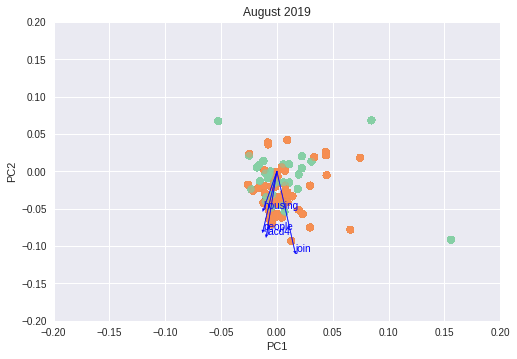

In [543]:
# Nithya is green, david is orange (CHANGE ALPHA)



tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(aug2019.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  



top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(aug2019.Handle=='@nithyavraman', .75, .25)

## visualize projections

max_arrow=0.2

for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes
    

    plt.arrow(0, 0, xvector[i]*10*scalex , yvector[i]*10*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*10*scalex , yvector[i]*10*scaley,
             list(top_words)[i], color='b')
    
# for i in range(n):
#     # Only plot the longer ones
#     length = sqrt(self.loadings.iloc[xval, i] ** 2 + self.loadings.iloc[yval, i] ** 2)
#     if length < max_arrow:
#         continue

#     plt.arrow(0, 0, self.loadings.iloc[xval, i], self.loadings.iloc[yval, i], color='g', alpha=0.9)
#     plt.text(self.loadings.iloc[xval, i] * 1.15, self.loadings.iloc[yval, i] * 1.15,
#          self.loadings.columns.tolist()[i], color='k', ha='center', va='center')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs*scalex ,ys*scaley, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')  
    plt.title('August 2019')
# plt.savefig('./images/pca/1aug_2019.png')
    
top_words[:4]

Index(['lacd4', 'homelessness', 'homeless', 'women', 'housing', 'others',
       'people', 'council', '2019', 'thank',
       ...
       'activities', 'kid', 'friendly', 'celebrates', 'hosted', 'prestigious',
       'laparksfoundation', 'third', 'games', 'foundation'],
      dtype='object', length=1300)

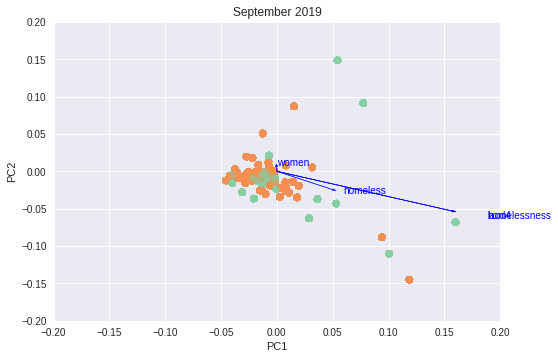

In [544]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(sep2019.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(sep2019.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*scalex , yvector[i]*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*1.2*scalex , yvector[i]*1.2*scaley,
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')  
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.title('September 2019')
# plt.savefig('./images/pca/2sept_2019.png')
top_words

Index(['people', 'housing', 'food', 'thank', 'homeless', 'others', 'lacd4',
       'join', 'council', 'community',
       ...
       'sandiegoreader', '870', '5d1a', 'investor', 'static', 'bee8', 'ticker',
       'nithyavraman6', '2018', 'cut'],
      dtype='object', length=1851)

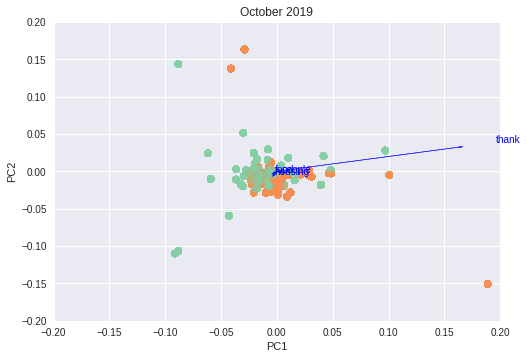

In [545]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(oct2019.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(oct2019.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*scalex , yvector[i]*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*1.2*scalex , yvector[i]*1.2*scaley,
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')  
    plt.title('October 2019')
# plt.savefig('./images/pca/3oct_2019.png')

top_words

Index(['housing', 'thank', 'homelessness', 'water', 'need', 'rent', 'people',
       'like', 'homeless', 'help',
       ...
       'refunds', 'jay', 'registered', 'presidents', 'mercurynews',
       'associate', 'embassies', 'ambassador', 'bush', 'foreign'],
      dtype='object', length=1779)

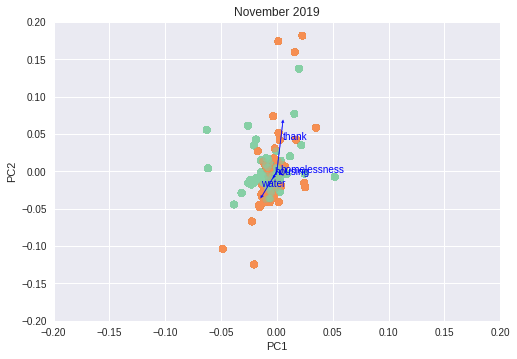

In [546]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(nov2019.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(nov2019.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*2*scalex , yvector[i]*2*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*2.3*max(xs) , yvector[i]*2.3*max(ys),
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')  
    plt.title('November 2019')
# plt.savefig('./images/pca/4nov_2019.png')

top_words

Index(['homelessness', 'housing', 'holiday', 'homeless', 'park', 'right',
       'trump', 'griffith', '2019', 'council',
       ...
       'size', 'unsuitable', 'transportation', 'identify', 'towards',
       'councils', 'pose', 'communities', 'restrict', 'safer'],
      dtype='object', length=1220)

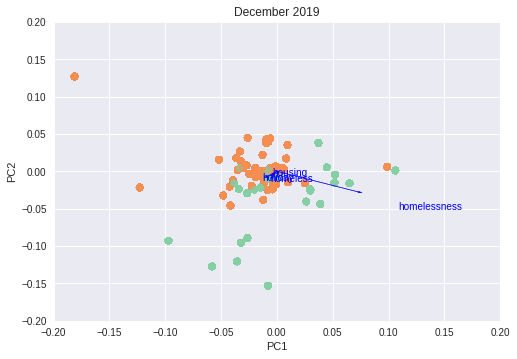

In [547]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(dec2019.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(dec2019.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*scalex , yvector[i]*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*2*max(xs) , yvector[i]*2*max(ys),
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')  
    plt.title('December 2019')
# plt.savefig('./images/pca/5dec_2019.png')
top_words

Index(['housing', 'homeless', 'people', 'homelessness', 'council',
       'nithyaforthecity', 'count', 'community', 'show', 'thank',
       ...
       'plates', 'healthy', 'exactly', 'breakfasts', 'burgers', 'fewer',
       'license', 'goodfoodla', 'undercuts', 'obama'],
      dtype='object', length=2162)

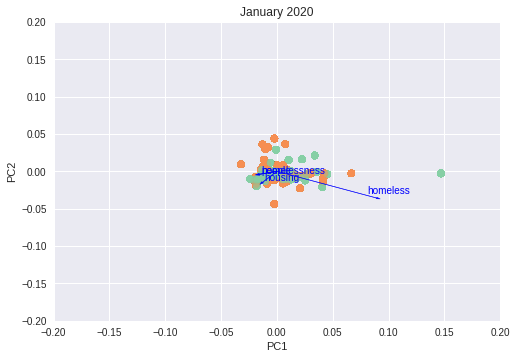

In [548]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(jan2020.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(jan2020.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*10*scalex , yvector[i]*10*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*10*max(xs) , yvector[i]*10*max(ys),
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')  
    plt.title('January 2020')
# plt.savefig('./images/pca/6jan_2020.png')
    
top_words

Index(['thank', 'support', 'housing', 'work', 'hate', 'lacity', 'campaign',
       'help', 'working', 'make',
       ...
       'millions', 'increases', 'google', 'docs', '2021', 'reflection',
       'process', 'priorities', 'discussions', 'ending'],
      dtype='object', length=1884)

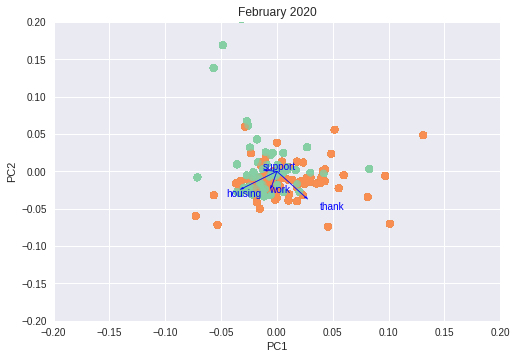

In [549]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(feb2020.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(feb2020.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*scalex*2 , yvector[i]*scaley*2,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*3*scalex , yvector[i]*3*scaley,
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.5)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')  
    plt.title('February 2020')
# plt.savefig('./images/pca/7feb_2020.png')

top_words

Index(['thank', 'rent', 'people', 'need', 'help', 'coronavirus', 'support',
       'lacity', 'working', 'council',
       ...
       'donorbox', 'distributionmealshygiene', 'powered', 'converted',
       'raising', 'outreach', 'echo', 'suppliesclothingppe', 'nohohome',
       'selahnhc'],
      dtype='object', length=2786)

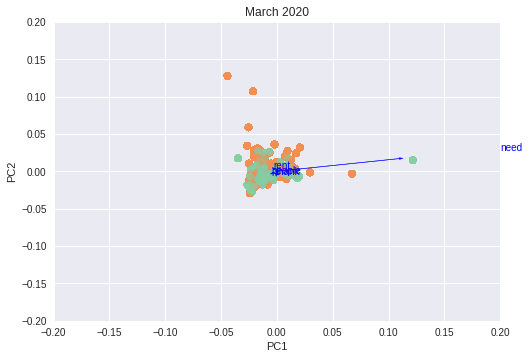

In [550]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(mar2020.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(mar2020.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*scalex , yvector[i]*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*2*max(xs) , yvector[i]*2*max(ys),
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('March 2020')
# plt.savefig('./images/pca/8mar_2020.png')

top_words

Index(['rent', 'need', 'lacity', 'tenants', 'help', 'mortgage', 'pandemic',
       'today', 'people', 'forgiveness',
       ...
       '0409', 'type', 'firms', 'unpaid', 'smith', 'doug', '63262324', 'view',
       'interested', 'dougsmth'],
      dtype='object', length=2717)

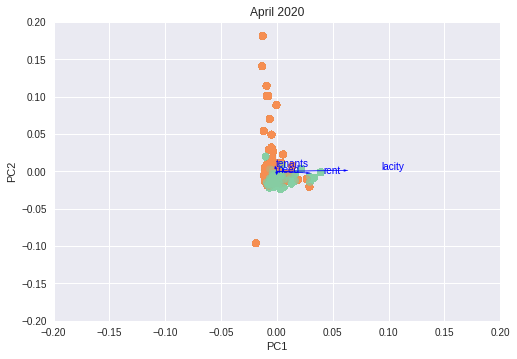

In [551]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(apr2020.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(apr2020.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*scalex , yvector[i]*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*2*max(xs) , yvector[i]*2*max(ys),
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])

    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')  
    plt.title('April 2020')
# plt.savefig('./images/pca/9apr_2020.png')

top_words

Index(['rent', 'need', 'workers', 'support', 'pandemic', 'today', 'lacity',
       'help', 'may', 'one',
       ...
       'firm', 'owner', 'followed', 'enrolled', '2017', 'eat', 'afford',
       'commissioned', 'usc', 'properly'],
      dtype='object', length=2346)

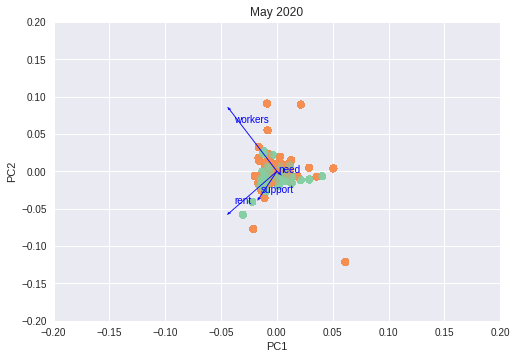

In [553]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(may2020.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(may2020.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*15*scalex , yvector[i]*15*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*15*max(xs) , yvector[i]*15*max(ys),
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')  
    plt.title('May 2020')
# plt.savefig('./images/pca/10may_2020.png')
    
top_words

Index(['people', 'homelessness', 'police', 'budget', 'blmla', 'housing',
       'forward', 'safety', 'must', 'make',
       ...
       'grade', 'grenade', 'barstow', 'sent', 'launchers', 'rifles', 'return',
       'unifieds', 'resistant', 'mine'],
      dtype='object', length=1781)

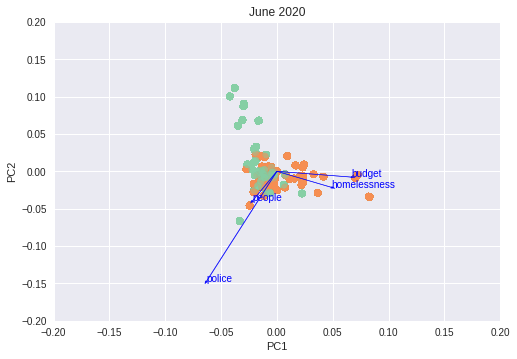

In [555]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(jun2020.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(jun2020.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*10*scalex , yvector[i]*10*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*10*scalex , yvector[i]*10*scaley,
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('June 2020')
# plt.savefig('./images/pca/11june_2020.png')

top_words


Index(['people', 'vendors', 'help', 'covid', 'resources', 'thank', 'thread',
       'work', '19', 'housing',
       ...
       'filed', '23', 'permanent', '63', '15', 'primexcaag', 'farm',
       'primexcaagunited', 'wefeedyou', 'gotten'],
      dtype='object', length=2362)

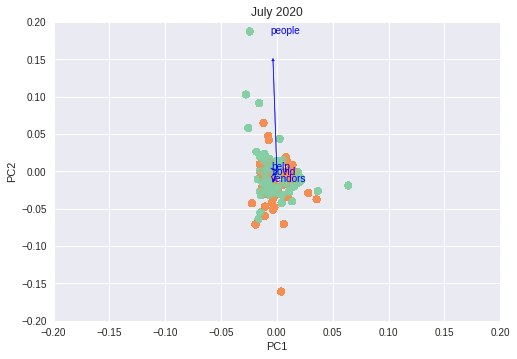

In [558]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(jul2020.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(jul2020.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*scalex , yvector[i]*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*2*max(xs) , yvector[i]*2*max(ys),
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('July 2020')
# plt.savefig('./images/pca/12july_2020.png')

top_words

Index(['need', 'lacity', 'today', 'oil', 'businesses', 'like', 'rent', 'small',
       'hate', 'council',
       ...
       'tracker', 'vacant', 'occupied', 'roomkeytracker', '725', 'secured',
       'projectroomkeytracker', 'capacity', 'stalled', 'promised'],
      dtype='object', length=2743)

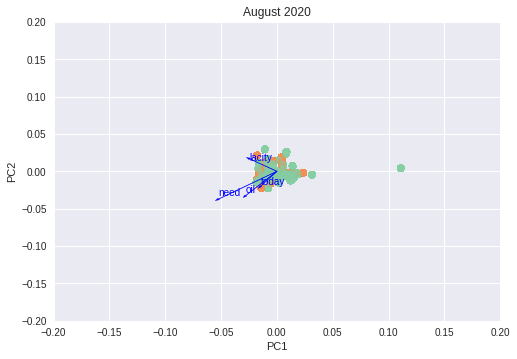

In [559]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(aug2020.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(aug2020.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*20*scalex , yvector[i]*20*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*20*max(xs) , yvector[i]*20*max(ys),
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('August 2020')
# plt.savefig('./images/pca/13aug_2020.png')

top_words

Index(['people', 'running', 'im', 'today', '19', 'covid', 'services', 'public',
       'many', 'safety',
       ...
       'extend', 'needs', 'sfvbj', 'sfv', 'eye', 'aviation', 'la_aviation',
       'paulkrekorian', 'ample', 'journal'],
      dtype='object', length=2031)

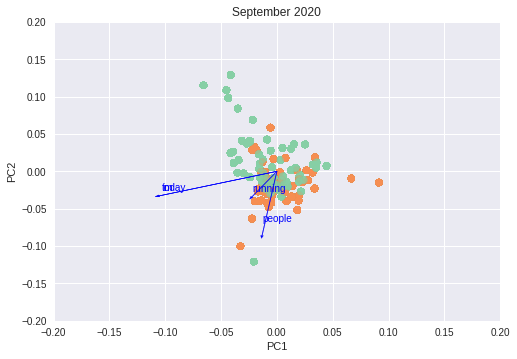

In [560]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(sep2020.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(sep2020.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*20*scalex , yvector[i]*20*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*20*max(xs) , yvector[i]*20*max(ys),
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')  
    plt.title('September 2020')
plt.savefig('./images/pca/14sept_2020.png')

top_words

Index(['small', 'work', 'nithyaforthecity', 'council', 'one', 'help', 'today',
       'housing', 'nithya', 'make',
       ...
       'prepared', 'likely', 'evacuation', 'moderate', 'southland', 'southern',
       'wildfires', 'parts', 'golos', 'prepare'],
      dtype='object', length=1733)

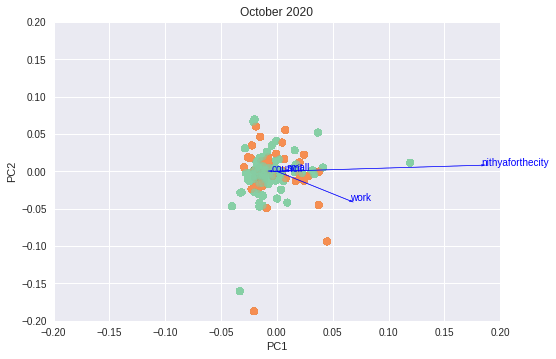

In [561]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(oct2020.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(oct2020.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*scalex , yvector[i]*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*scalex , yvector[i]*scaley,
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')  
    plt.title('October 2020')
# plt.savefig('./images/pca/15oct_2020.png')

top_words

Index(['nithyaforthecity', 'phonebanking', 'nithya', 'work', 'campaign', 'im',
       'people', 'hall', 'many', 'put',
       ...
       'plans', 'evict', 'passed', 'far', 'pay', 'finding', 'prevent',
       'coronavirus', 'self', 'stepped'],
      dtype='object', length=634)

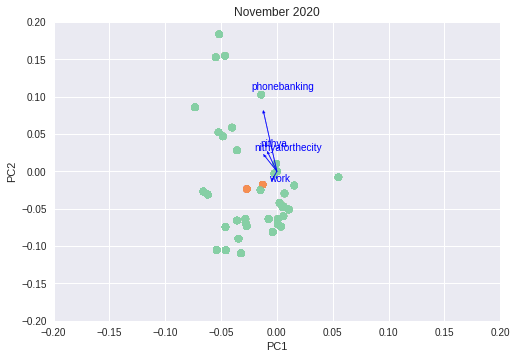

In [562]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words=new_stop, max_features=3000) 

scaler = StandardScaler()


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(y_train=='@nithyavraman', .75, .25)

tfidf = tf.fit_transform(nov2020.Text)
tfidf_df = pd.DataFrame(tfidf.todense(), columns = sorted(tf.vocabulary_))

X=scaler.fit_transform(tfidf_df)

pca = PCA(n_components=30)

X_new = pca.fit_transform(X)  


top_words = pd.Series(tfidf_df.sum(axis=0)).sort_values(ascending=False).index

xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(tfidf_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(tfidf_df)[:,1]

scalex = 1.0 / (max(xs) - min(xs))  # Rescaling to be from -1 to +1
scaley = 1.0 / (max(ys) - min(ys))


cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)

z = np.where(nov2020.Handle=='@nithyavraman', .75, .25)

## visualize projections


for i in range(4):
# arrows project features (ie columns from csv) as vectors onto PC axes

    plt.arrow(0, 0, xvector[i]*scalex , yvector[i]*scaley,
              color='b', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*2*max(xs) , yvector[i]*2*max(ys),
             list(top_words)[i], color='b')

for i in range(len(ys)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(xs ,ys, c = cmap(norm(z)),alpha = 0.3)
#     plt.scatter(xs[i], ys[i], color = clr[i])
    plt.xlim(-.2, .2)
    plt.ylim(-.2, .2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')  
    plt.title('November 2020')
# plt.savefig('./images/pca/16nov_2020.png')
top_words

In [202]:
X_train, X_test, y_train, y_test = train_test_split(cands.Text, cands.labels, stratify=cands.labels)

In [203]:
count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words=cust_stop,
                             analyzer='word', max_features=3000, ngram_range=(1,2))

X_train_cvect = count_vect.fit_transform(X_train)

X_test_cvect = count_vect.transform(X_test)

trump_test = count_vect.transform(trump.Text)

NameError: name 'trump' is not defined

In [204]:
import xgboost
# XGBoost Classifier
from xgboost import XGBClassifier
# Classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Cross validation
from sklearn.model_selection import KFold

In [205]:
xg = XGBClassifier(max_depth=2, n_estimators=30)

xg

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [206]:
# Initialize the KFold parameters
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
# Perform K-Fold Cross Validation
results = cross_val_score(xg, X_train_cvect, y_train, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 79.60% (1.33%)


In [207]:
xg.fit(X_train_cvect, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

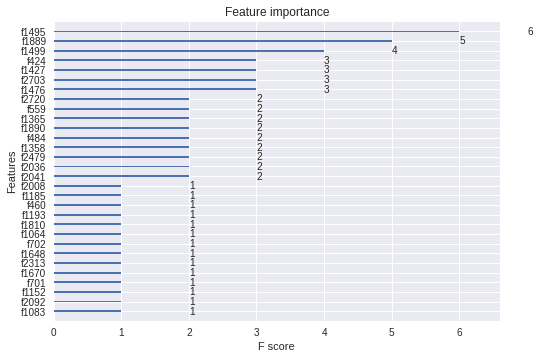

In [208]:
# Plot the top 7 features
xgboost.plot_importance(xg, max_num_features=30)
# Show the plot
plt.show()

In [210]:
# Predict the trading signal on test dataset
y_pred = xg.predict(X_test_cvect)
# Get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.44      0.59       711
           1       0.77      0.98      0.86      1345

    accuracy                           0.79      2056
   macro avg       0.84      0.71      0.72      2056
weighted avg       0.81      0.79      0.77      2056



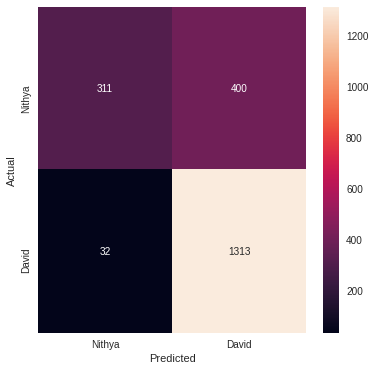

In [233]:
'''





Check decision rules solutions for standard confusion matrix, or look at docs to verify








'''


array = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
df = pd.DataFrame(array, index=['Nithya', 'David'], columns=[
'Nithya', 'David'])
plt.figure(figsize=(6, 6))
sns.heatmap(df, annot=True, cmap='rocket', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

{0: 232, 1: 3663}

In [1]:
'''

* Pickle for pickle's sake

    
* Sentiment Analysis (see https://github.com/dr-rodriguez/The-Divided-States-of-America/blob/master/analysis.py)

* S3 for new tweets?


'''

"\n\n* Pickle for pickle's sake\n\n    \n* Sentiment Analysis (see https://github.com/dr-rodriguez/The-Divided-States-of-America/blob/master/analysis.py)\n\n* S3 for new tweets?\n\n\n"

In [275]:
def modelfit(alg, X, y, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        # y = pd.get_dummies(y)
        xgtrain = x.DMatrix(X, label=y)
        cvresult = x.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        print("Num of n_estimators:", cvresult.shape[0])
        alg.set_params(n_estimators=cvresult.shape[0])
    #Fit the algorithm on the data
    alg.fit(X, y, eval_metric='auc')
    #Predict training set:
    y_pred = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
    #Print model report:
    print("\nModel Report")
    print(classification_report(y, y_pred))
    print(f"AUC Score (Train): {roc_auc_score(y, dtrain_predprob)}")

In [ ]:
modelfit(xg)

In [212]:
trump = pd.read_csv('data/trump.csv')

In [213]:
trump['Comments'].fillna(0, inplace=True)
trump['Likes'].fillna(0, inplace=True)
trump['Retweets'].fillna(0, inplace=True)
trump.Emojis.fillna('', inplace=True)
trump.Text.fillna('', inplace=True)

In [214]:
trump = trump.drop(['Emojis', 'Comments', 'Likes', 'Retweets'], axis=1)

In [215]:
trump = trump.astype({'Timestamp': 'datetime64'})

In [216]:
trump = trump.loc[trump.Handle.isin(['@realDonaldTrump'])]

In [217]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3895 entries, 0 to 3894
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   3895 non-null   object        
 1   Handle     3895 non-null   object        
 2   Timestamp  3895 non-null   datetime64[ns]
 3   Text       3895 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 152.1+ KB


In [218]:
tf = TfidfVectorizer(strip_accents='ascii', stop_words='english', max_features=3000) 

scaler = StandardScaler()

trumpfidf = tf.fit_transform(trump.Text)
trumpfidf_df = pd.DataFrame(trumpfidf.todense(), columns = sorted(tf.vocabulary_))

X_trump=scaler.fit_transform(trumpfidf_df)

pca = PCA(n_components=30)

X_new_trump = pca.fit_transform(X_trump)  

top_words = pd.Series(trumpfidf_df.sum(axis=0)).sort_values(ascending=False).index

In [219]:
top_words

Index(['trump', 'team', 'great', 'vote', 'thank', 'com', 'biden', 'house',
       'news', 'president',
       ...
       'rage', 'averages', 'deficit', 'unverified', 'eyewitness', '20buttons',
       'mcadams', 'baris', 'pundit', 'glitch'],
      dtype='object', length=3000)

In [220]:
mixed_df = pd.concat([david, nithya, trump])

In [221]:
mixed_df = mixed_df.drop(['Emojis', 'Comments', 'Likes', 'Retweets'], axis=1)

In [222]:
mixed_df = mixed_df.loc[mixed_df.Handle.isin(['@davideryu', '@nithyavraman', '@realDonaldTrump'])]

In [223]:
mixed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12119 entries, 0 to 3894
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UserName   12119 non-null  object        
 1   Handle     12119 non-null  object        
 2   Timestamp  12119 non-null  datetime64[ns]
 3   Text       12119 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 473.4+ KB


In [228]:
xg2 = XGBClassifier(max_depth=4, n_estimators=50)

In [229]:
xg2.fit(X2_train_cvect, y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [231]:
y2_pred = xg2.predict(X2_test_cvect)

np.mean(y2_pred == y2_test)

0.8445544554455445

                  precision    recall  f1-score   support

      @davideryu       0.80      0.93      0.86      1345
   @nithyavraman       0.88      0.67      0.76       711
@realDonaldTrump       0.90      0.86      0.88       974

        accuracy                           0.84      3030
       macro avg       0.86      0.82      0.83      3030
    weighted avg       0.85      0.84      0.84      3030



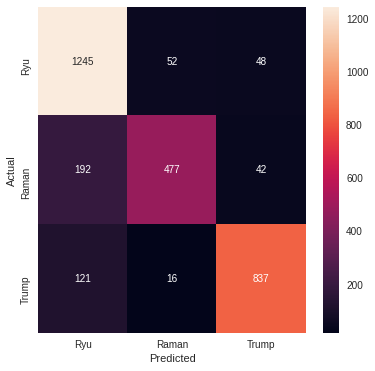

In [232]:
print(classification_report(y2_test, y2_pred))

array = confusion_matrix(y2_test, y2_pred)

df = pd.DataFrame(array, index=['Ryu', 'Raman', 'Trump'], columns=['Ryu', 'Raman', 'Trump'])
plt.figure(figsize=(6, 6))
sns.heatmap(df, annot=True, cmap='rocket', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [630]:
df

,0,1,2
0,1214,76,55
1,185,480,46
2,113,11,850


In [ ]:
'''

Throw trump tweets into model trained only on nithya and david, quick review of results

'''

In [ ]:
a = xg.predict(trump_test)

unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

In [226]:
X2_train, X2_test, y2_train, y2_test = train_test_split(mixed_df.Text, mixed_df.Handle, stratify=mixed_df.Handle)

In [227]:
count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words=cust_stop,
                             analyzer='word', max_features=3000, ngram_range=(1,2))

X2_train_cvect = count_vect.fit_transform(X2_train)

X2_test_cvect = count_vect.transform(X2_test)

In [420]:
rf2 = RandomForestClassifier(n_estimators=100, oob_score=True)

In [423]:
rf2.fit(X2_train_cvect, y2_train)

RandomForestClassifier(oob_score=True)

In [425]:
np.mean(rf2.predict(X2_test_cvect)==y2_test)

0.9138613861386139

In [457]:
# word_count
nithya['word_count'] = nithya['Text'].apply(lambda x: len(str(x).split()))
david['word_count'] = david['Text'].apply(lambda x: len(str(x).split()))

# unique_word_count
nithya['unique_word_count'] = nithya['Text'].apply(lambda x: len(set(str(x).split())))
david['unique_word_count'] = david['Text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
nithya['stop_word_count'] = nithya['Text'].apply(lambda x: len([w for w in str(x).lower().split() if w in cust_stop]))
david['stop_word_count'] = david['Text'].apply(lambda x: len([w for w in str(x).lower().split() if w in cust_stop]))

# url_count
nithya['url_count'] = nithya['Text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
david['url_count'] = david['Text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
nithya['mean_word_length'] = nithya['Text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
david['mean_word_length'] = david['Text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# hashtag_count
nithya['hashtag_count'] = nithya['Text'].apply(lambda x: len([c for c in str(x) if c == '#']))
david['hashtag_count'] = david['Text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
nithya['mention_count'] = nithya['Text'].apply(lambda x: len([c for c in str(x) if c == '@']))
david['mention_count'] = david['Text'].apply(lambda x: len([c for c in str(x) if c == '@']))


/home/mario/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [458]:
nithya

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,hashtag_count,mention_count
0,Nithya Raman,@nithyavraman,2020-11-04 01:22:32,This campaign was never about any one person. ...,,57.0,261,2000,34,31,17,0,4.323529,0,0
1,Nithya Raman,@nithyavraman,2020-11-17 22:32:56,Very excited to be joining \n@PplsAction\n and...,,3.0,26,190,70,61,20,1,5.757143,0,8
2,Nithya Raman,@nithyavraman,2020-11-07 01:58:36,"To the residents of CD4, our brilliant, kind, ...",,184.0,1500,13000,44,38,21,0,4.863636,0,0
3,Nithya Raman,@nithyavraman,2020-11-07 02:01:25,Replying to \n@nithyavramanTo the people of Co...,,5.0,15,779,41,37,20,0,4.439024,0,1
4,Nithya Raman,@nithyavraman,2020-11-07 02:02:06,I have countless people to thank individually....,,25.0,25,961,54,44,32,0,3.981481,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,Nithya Raman,@nithyavraman,2011-10-01 10:53:51,#Chennai ... So humid my floors are slick,,0.0,0,0,8,8,3,0,4.250000,1,0
1187,Nithya Raman,@nithyavraman,2011-10-01 10:51:40,@HEEMS\n Suri of Das Racist unveiled: surprisi...,,0.0,0,0,17,16,4,1,9.470588,0,1
1188,Nithya Raman,@nithyavraman,2011-09-29 16:50:19,Just read Rebecca Skloot's Immortal Life... an...,,0.0,0,0,19,18,8,0,5.736842,0,0
1189,Nithya Raman,@nithyavraman,2011-09-29 16:47:40,Glenn Greenwald on the Wall Street protests as...,,0.0,0,0,19,18,7,1,5.263158,0,0


In [432]:
'''

word clouds for each candidate


'''

'\n\nword clouds for each candidate\n\n\n'

In [466]:
vectorizer = TfidfVectorizer(stop_words=cust_stop, max_features=3000, ngram_range=(1,2))
nit_X = vectorizer.fit_transform(nithya.Text)
nit_features = vectorizer.get_feature_names()

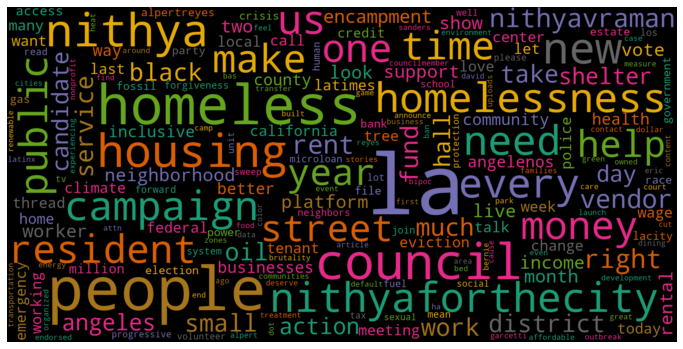

In [609]:
string = []
for t in nit_features:
    if t not in cust_stop:
        string.append(t)
string = pd.Series(string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='Dark2').generate(string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [469]:
vectorizer = TfidfVectorizer(stop_words=cust_stop, max_features=3000, ngram_range=(1,2))
ryu_X = vectorizer.fit_transform(david.Text)
ryu_features = vectorizer.get_feature_names()

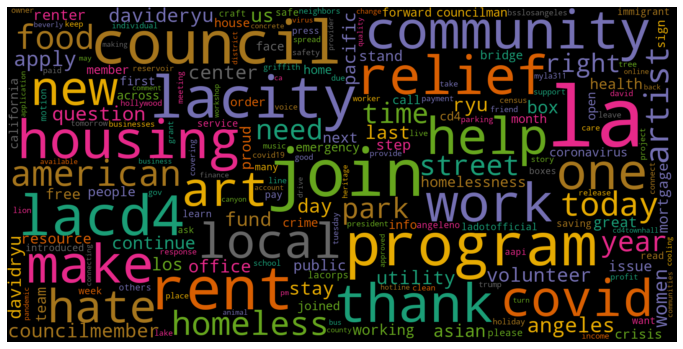

In [608]:
string = []
for t in ryu_features:
    if t not in cust_stop:
        string.append(t)
string = pd.Series(string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='Dark2').generate(string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [490]:
import re

nit_lst = []

for i in nithya.Text:
    x = re.findall('(#+[a-zA-Z0-9(_)]{1,})', i)
    if len(x)>0:
        nit_lst.append(x)

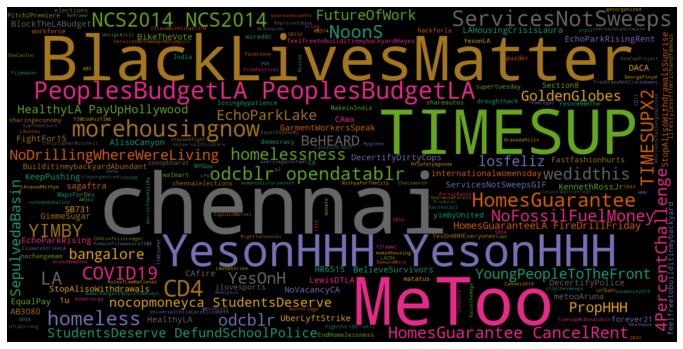

In [607]:
nit_hash_string = []
for t in nit_lst:
    nit_hash_string.append(' '.join(t))
nit_hash_string = pd.Series(nit_hash_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='Dark2').generate(nit_hash_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [496]:
ryu_lst = []

for i in david.Text:
    x = re.findall('(#+[a-zA-Z0-9(_)]{1,})', i)
    if len(x)>0:
        ryu_lst.append(x)

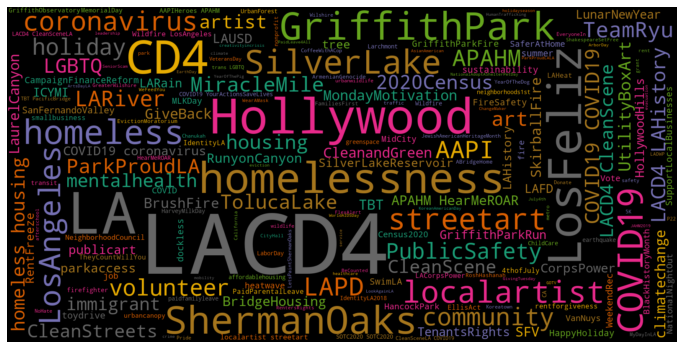

In [606]:
ryu_hash_string = []
for t in ryu_lst:
    ryu_hash_string.append(' '.join(t))
ryu_hash_string = pd.Series(ryu_hash_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='Dark2').generate(ryu_hash_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [461]:
nithya['Text'].apply(lambda x: [w for w in str(x).lower().split() if w not in cust_stop])

0       [campaign, never, one, person., we’ve, built, ...
1       [excited, joining, @pplsaction, really, incred...
2       [residents, cd4,, brilliant,, kind,, inspiring...
3       [@nithyavramanto, people, council, district, 4...
4       [countless, people, thank, individually., now,...
                              ...                        
1186                [#chennai, ..., humid, floors, slick]
1187    [@heems, suri, das, racist, unveiled:, surpris...
1188    [read, rebecca, skloot's, immortal, life..., u...
1189    [glenn, greenwald, wall, street, protests, ask...
1190    [hundreds, davids, house, la, going, sale:, ht...
Name: Text, Length: 3408, dtype: object

In [433]:
from nltk.classify.scikitlearn import SklearnClassifier

In [ ]:
SklearnClassifier

In [498]:
from matplotlib.animation import FuncAnimation, PillowWriter

In [ ]:

ani = FuncAnimation(fig, update, np.linspace(0, 2*np.pi, 64), init_func=init)  
plt.show()


In [596]:
import os
import imageio

png_dir = './images/pca/'
images = []
for file_name in lst_images:
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('./images/gifs/movie.gif', images, duration=1.5)


In [595]:
lst_images = ['1aug_2019.png', '2sept_2019.png', '3oct_2019.png', '4nov_2019.png', '5dec_2019.png', '6jan_2020.png', '7feb_2020.png', '8mar_2020.png', '9apr_2020.png', '10may_2020.png', '11june_2020.png', '12july_2020.png', '13aug_2020.png', '14sept_2020.png', '15oct_2020.png', '16nov_2020.png']

Text(0, 0.5, 'Count')

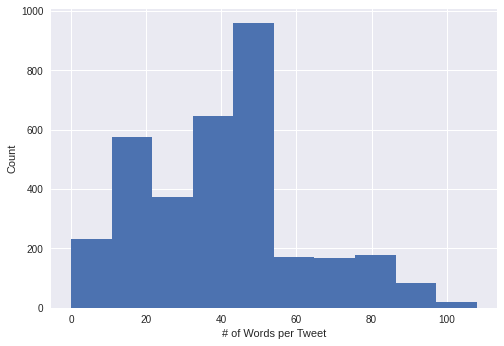

In [646]:
nithya['word_count'].hist()
plt.xlabel('# of Words per Tweet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

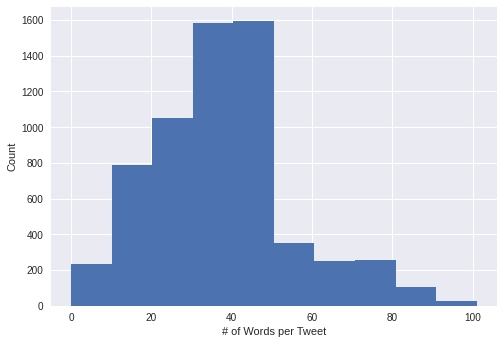

In [645]:
david['word_count'].hist()
plt.xlabel('# of Words per Tweet')
plt.ylabel('Count')

In [641]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################


print("%d documents" % len(cands.Text))
print("%d categories" % len(cands.Handle.unique()))
print()

# #############################################################################
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=cust_stop)),
    ('tfidf', TfidfTransformer()),
    ('clf', XGBClassifier()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75),
    'vect__max_features': (1000, 2000, 3000),
    'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    # 'clf__max_iter': (20,),
    # 'clf__alpha': (0.00001, 0.000001),
    # 'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
    'clf__n_estimators': [50, 100, 200, 400],
    'clf__max_depth': [2, 4, 8],
    'clf__subsample': [0.3, 0.5, 0.7]
}

# multiprocessing requires the fork to happen in a __main__ protected
# block

# find the best parameters for both the feature extraction and the
# classifier
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(cands.Text, cands.Handle)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

8223 documents
2 categories

pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__max_depth': [2, 4, 8],
 'clf__n_estimators': [50, 100, 200, 400],
 'clf__subsample': [0.3, 0.5, 0.7],
 'vect__max_df': (0.5, 0.75),
 'vect__max_features': (1000, 2000, 3000),
 'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 19.7min finished


done in 1187.799s

Best score: 0.931
Best parameters set:
	clf__max_depth: 8
	clf__n_estimators: 400
	clf__subsample: 0.7
	vect__max_df: 0.5
	vect__max_features: 2000
	vect__ngram_range: (1, 3)


In [ ]:
'''

Ideal situation: pay for best premium twitter API access, get geographic data, 
and be able quantify amound of national attention.

I also originally intended to do sentiment analysis and further work on this project will definitely include
using pre-labeled tweets or other text to be able to see not only the sentiment of the candidate tweets,
but sentiment of tweets at/about candidates.

'''